# Predicting customer churn for SyriaTel

Authors: Dolgor Purbueva, Emma Scotson

## Overview 

This project predicts customer churn in a telecommunication company using machine learning tools to analyze historical data on customer behavior, service usage, and location factors.   

The goal is to identify patterns that signal when a customer is likely to cancel their service. By leveraging predictive models such as logistic regression or decision trees, the company can proactively intervene with targeted offers or improved services to retain at-risk customers.   

This project will utilize a dataset of SyriaTel customer interactions and subscription details, applying data preprocessing, feature engineering, and model evaluation to develop an accurate churn prediction model. This approach not only enhances customer satisfaction and loyalty but also significantly reduces loss in revenue.

<img src="images/image1.png" width="500">

## Business understanding

[Churn management is the concept of identifying those customers who intend to move their custom to a competing service provider.](https://www.sciencedirect.com/science/article/abs/pii/S0305054805003503?via%3Dihub)

Preventing customer churn is crucial for telecommunications companies due to its direct impact on profitability. High churn rates reflect customer dissatisfaction, which not only results in lost revenue but also increases the cost associated with acquiring new customers. [Getting a new customer can cost five to twenty-five times more than keeping an existing customer.](https://link.springer.com/article/10.1007/s42452-023-05389-6)

Studies have shown that even a small reduction in churn can significantly boost the company's revenue. For example, [a 5% reduction in churn can increase profits by 25% to 95% depending on the industry context](https://link.springer.com/article/10.1007/s42452-023-05389-6). This substantial effect arises because retained customers are likely to buy more over time and often cost less to serve due to their familiarity with the service and products.

Additionally, predictive analytics in churn prevention allows telecom companies to identify at-risk customers early on, enabling them to take targeted actions to retain these customers. This proactive approach not only saves money but also improves customer satisfaction and loyalty by addressing their concerns before they lead to defection.

Moreover, with the telecom industry being highly competitive, maintaining customer loyalty through effective churn management strategies can provide a significant edge over competitors, as it ensures a stable revenue stream and reduces the volatility of the customer base.

![Alt text](images/image2.png)

## Stakeholder

Syriatel is a telecommunications provider, offering mobile services like domestic and international voice calls, SMS and voice mail to millions of subscribers. The company employs approximately 3,500 employees and serves 8 million customers as of 2016. It is headquartered on Sehnaya Road in Damascus according to [Wikipedia](https://en.wikipedia.org/wiki/Syriatel)

As the main stakeholder, the company will benefit from this analysis by reducing customer churn rates, potentially increasing revenues and profits, promoting growth, and enhancing its market position. Improved customer service will also benefit customer satisfaction rates. As the company grows in revenue, profits, customer base, and market share, shareholders will see greater returns on their investments.

**Potential Business Questions:**

* What were the factors influencing customer churn?
* Which services have the highest impact on customer churn?
* What services do customers with longer tenure have?
* What percentage of customers leave after one month/6 months/1 year?
* Which state has the highest churn rate?
* What is the best model for predicting customer churn?

**Objectives:**
* identify the key features that determine if a customer is likely to churn
* determine the most suitable model to predict customer churn 
* give customer retention recommendations to reduce churn

### Data understanding

The dataset contains 3333 rows and 21 columns, giving details on customers' state, account length, area code, phone number, plans, and statistics on service usage such as calls, minutes, and charges across different times of the day, international usage, and customer service interactions, along with churn status.

In [612]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

from scipy.stats import chi2_contingency

In [613]:
df = pd.read_csv('churn_data.csv')
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [614]:
# Making copy to help with EDA at end of notebook
df_copy = df

In [615]:
df.shape

(3333, 21)

In [616]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [617]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [618]:
df.duplicated().sum()

0

In [619]:
df['phone number'].duplicated().value_counts()

False    3333
Name: phone number, dtype: int64

In [620]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### Data dictionary 

* state: State where the customer resides
* account length: Duration (in days) the account has been active
* area code: Customer's area code
* phone number: Customer's phone number
* international plan: Indicates if the customer subscribes to the international plan
* voice mail plan: Indicates if the customer subscribes to the voice mail plan
* number vmail messages: Number of voicemails sent by the customer
* total day minutes: Total minutes of calls made during the day
* total day calls: Total number of daytime calls made
* total day charge: Charges for daytime calls
* total eve minutes: Total minutes of calls made during the evening
* total eve calls: Total number of evening calls made
* total eve charge: Charges for evening calls
* total night minutes: Total minutes of calls made at night
* total night calls: Total number of nighttime calls made
* total night charge: Charges for nighttime calls
* total intl minutes: Total minutes of international calls made
* total intl calls: Total number of international calls made
* total intl charge: Charges for international calls
* customer service calls: Number of customer service calls made
* churn: Indicates if the customer has terminated their contract

We have a datagrame with 3333 rows, 21 columns, with no missing values and no dupilcates.

### Data cleaning

The data set is originally very clean, we just need to make a couple if adjustments:  
* We replace spaces with a underline in the column name for a convinient format and to avoid mistakes.  
* We drop phone number column, as it doesn't bring any value for future analysis, it's a unique value for each row and we already used it to check for duplicates.  
* We replace values in three columns to 1s and 0s for further steps.

In [621]:
#renaming columns
df.columns = df.columns.str.replace(' ', '_')

In [622]:
#replacing objects and bool to numbers

df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0}).astype(int)

df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0}).astype(int)

df['churn'] = df['churn'].astype(int)

### Identify Relevant Columns

Let's examine our columns a little further, to determine which ones contain relevant information to our dataset.

In [623]:
df.keys()

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

### State

In [624]:
df['state'].value_counts(normalize=True, ascending=False)

WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
OR    0.023402
OH    0.023402
WI    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
VT    0.021902
MI    0.021902
ID    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
MD    0.021002
KS    0.021002
MT    0.020402
NC    0.020402
NJ    0.020402
NV    0.019802
CO    0.019802
WA    0.019802
MS    0.019502
RI    0.019502
MA    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
NM    0.018602
ND    0.018602
ME    0.018602
DE    0.018302
NE    0.018302
OK    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
TN    0.015902
HI    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64

Looks like our data is pretty evenly distributed across the states...the value_counts range betwen 1-3%, which is a slight difference, but probably not a great enough discrepancy to draw great conclusions. 

### Account Length

In [625]:
df['account_length'].value_counts(normalize=True, ascending=False)

105    0.012901
87     0.012601
93     0.012001
101    0.012001
90     0.011701
         ...   
191    0.000300
199    0.000300
215    0.000300
221    0.000300
2      0.000300
Name: account_length, Length: 212, dtype: float64

### Area Code

In [626]:
df['area_code'].value_counts(normalize=True, ascending=False)

415    0.496550
510    0.252025
408    0.251425
Name: area_code, dtype: float64

In [627]:
df['state'].nunique()

51

This is very odd. Why is there information from only three area codes? Especially given that we have calls from customers across all 50 states? 

Let's look at what geographic locations correspond to these three area-codes.

**415**: San Francisco, CA

**510**: East Bay cities in Northern California

**408**: San Jose, CA

### California Customers

All of the customers in our dataset have **California area codes**. Why is this?

It will probably be more helpful (if at all) to determine *from where the customer is calling*, rather than the area-code in which they originally purchased their cell-phone plan.

Let's create a key with this information, in case we need to easily and quickly refer to it later on. 

In [628]:
area_codes = {
    415: 'San Francisco, CA',
    510: 'East Bay cities, Northern CA',
    408: 'San Jose, CA'
}

In [629]:
keys = {
    'area_codes' : area_codes
}

#### Extracting prefix codes from phone_number

We can extract the 'prefix' from each phone_number, which gives us information about a smaller region within a given area code. This might be helpful later on.

In [630]:
# Extract area code function
def extract_prefix(phone_number):
    prefix = phone_number[:3]  # Extracts first three characters
    return prefix

# Apply function to create new column
df['prefix'] = df['phone_number'].apply(extract_prefix)

df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,prefix
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,382
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,371
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,358
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,375
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,330


In [631]:
df['prefix'].value_counts()

405    53
408    48
406    47
352    47
333    46
       ..
342    24
421    24
412    23
327    19
422    19
Name: prefix, Length: 96, dtype: int64

In [632]:
df['prefix'].nunique()

96

### Customer Service

In [633]:
df['customer_service_calls'].value_counts(normalize=True, ascending=False)

1    0.354335
2    0.227723
0    0.209121
3    0.128713
4    0.049805
5    0.019802
6    0.006601
7    0.002700
9    0.000600
8    0.000600
Name: customer_service_calls, dtype: float64

Interesting!! Out of all the data in our dataset, only 21% of customers did **not** call customer service at least once.

We should examine how many of these are related to churn in our EDA.

### Total Call-Time, and Call-Charge.

It would be great if we could make a new column, documenting the total number of minutes spent calling and/or the total charges made to a particular phone number. However, there seems to be an overlap between the *international* data, and the data based on *time of day*. (AKA, we can assume that "total_day_calls" includes the international calls made during the day, which are also documented in "total_intl_calls").

Time of day probably doesn't matter as much as location with regards to quality of telecommunications. We can feel good about focusing on the total number of minutes called & charged, regardless of time of day.

In [634]:
# Creating new columns total_minutes and total_charge
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] 
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

### International Calls

At first glance, it might not seem necessary to have both 'international_plan' as well as 'total_intl_minutes'. We can assume someone has an international_plan, if they're logging a lot of minutes in international calls...why would we need to know both?

However, there might be instances in which people purchase an international_plan, then have technical difficulties preventing them from spending as many 'intl_minutes' on international calls as they'd like to...leading to churn. We'll keep these columns, and keep this in mind as we explore our data and run some tests.

### Dropping Columns

Let's drop our 'phone_number' column. We'll want to drop a bunch more, in order to hone in on feature selection. But we'll wait until we run some tests to check for multicollinearity.

In [635]:
#drop unnecessary column
df = df.drop('phone_number', axis=1)

Let's take a look at a final clean columns -  3333 rows and 20 columns. Edited column names and replaces values in three columns

In [636]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,prefix,total_minutes,total_charge
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,0,382,707.2,72.86
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,0,371,611.5,55.54
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,0,358,527.2,59.00
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,0,375,558.2,65.02
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,0,330,501.9,49.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,...,83,12.56,9.9,6,2.67,2,0,414,650.8,57.43
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,...,123,8.61,9.6,4,2.59,3,0,370,575.8,60.94
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,...,91,8.64,14.1,6,3.81,2,0,328,661.5,63.93
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,...,137,6.26,5.0,10,1.35,2,0,364,512.6,56.18


### EDA

Let's plot and take a look at distribution of all numerical columns. 

In [637]:
numeric = df.select_dtypes(include=['float64','int64'])

num_plots = len(numeric.columns)
num_plots

21

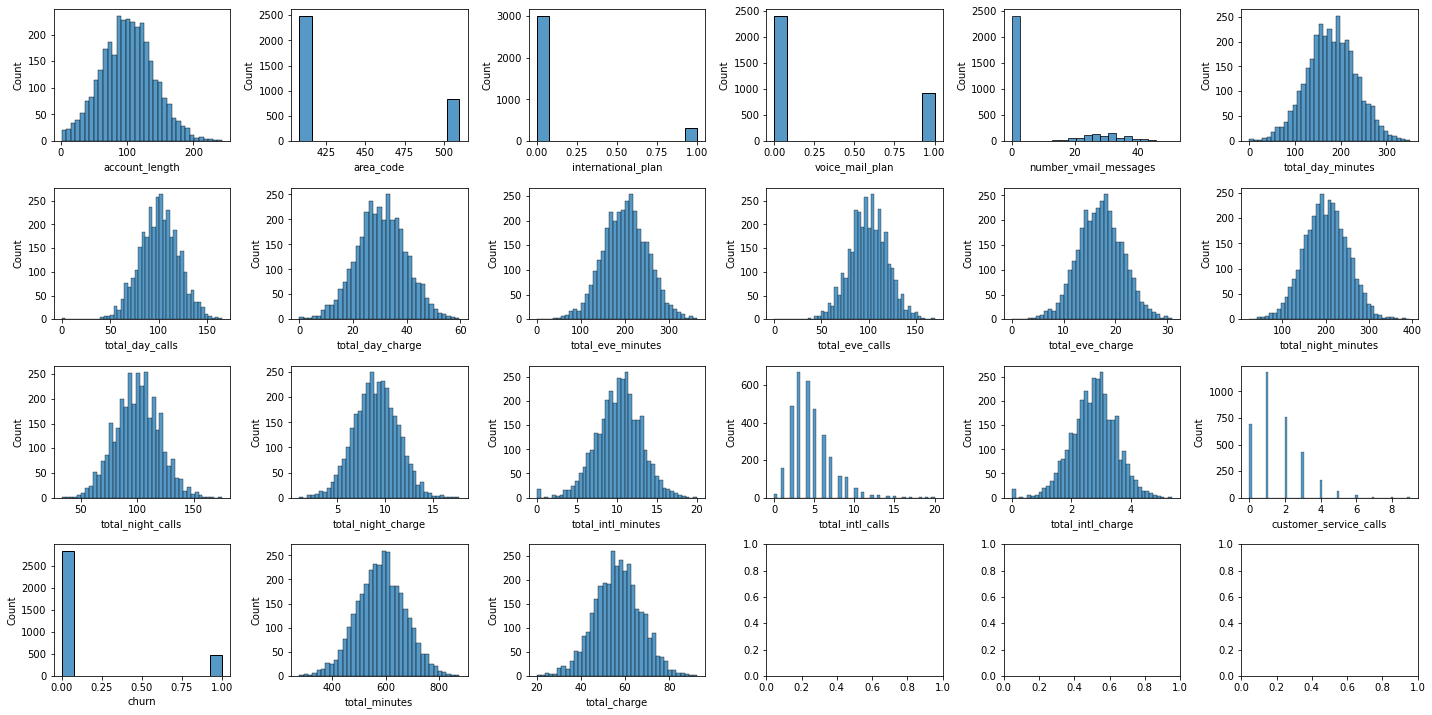

In [638]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through numeric columns and plot histograms
for i, feature in enumerate(numeric):
    sns.histplot(df[feature], ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Target variable

Target variable is churn. It is a binary variable.

The dataset is imbalanced. Around 85% of target variable has a value of 0, and around 15% value of 1.

A dataset is considered imbalanced for regression tasks when the distribution of the target variable is skewed or has outliers that can disproportionately influence the model's performance. It can make the model biased towards more frequent values.

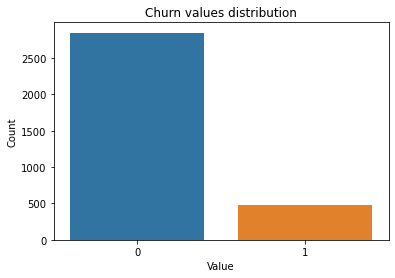

In [639]:
sns.countplot(x='churn', data=df)
plt.title('Churn values distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [640]:
df['churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

### Feature analysis

In [641]:
# Create numeric and categorical lists

categorical = ['state','area_code','international_plan','voice_mail_plan', 'phone_number']

numerical = ['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge',
                'total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls',
                'total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','customer_service_calls']

We have three different area codes. 50% of clients are in area 415, 25% in area 510, 25% in area 408.

In [642]:
df['area_code'].value_counts(normalize=True)

415    0.496550
510    0.252025
408    0.251425
Name: area_code, dtype: float64

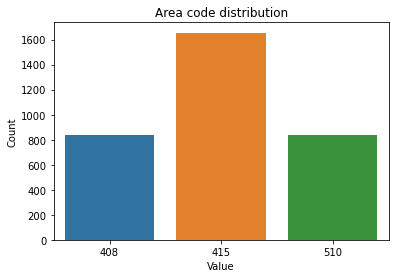

In [643]:
sns.countplot(x='area_code', data=df)
plt.title('Area code distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

90% of clients dont have an international plan

In [644]:
df['international_plan'].value_counts(normalize=True)

0    0.90309
1    0.09691
Name: international_plan, dtype: float64

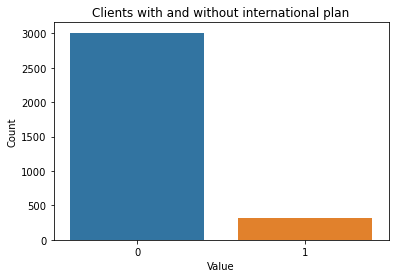

In [645]:
sns.countplot(x='international_plan', data=df)
plt.title('Clients with and without international plan')
plt.xlabel('Value')
plt.ylabel('Count')

plt.show()

27% of clients have voice mail plan and 72% dont have a voice mail plan

In [646]:
df['voice_mail_plan'].value_counts(normalize=True)

0    0.723372
1    0.276628
Name: voice_mail_plan, dtype: float64

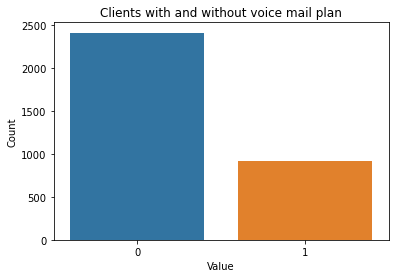

In [647]:
sns.countplot(x='voice_mail_plan', data=df)
plt.title('Clients with and without voice mail plan')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

Let's take a look at how clients are dictributed geographically among states.
Least amount of clients are located in California, most amount of clients are in West Virginia.

In [648]:
df['state'].value_counts(normalize=True)

WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
OR    0.023402
OH    0.023402
WI    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
VT    0.021902
MI    0.021902
ID    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
MD    0.021002
KS    0.021002
MT    0.020402
NC    0.020402
NJ    0.020402
NV    0.019802
CO    0.019802
WA    0.019802
MS    0.019502
RI    0.019502
MA    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
NM    0.018602
ND    0.018602
ME    0.018602
DE    0.018302
NE    0.018302
OK    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
TN    0.015902
HI    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64

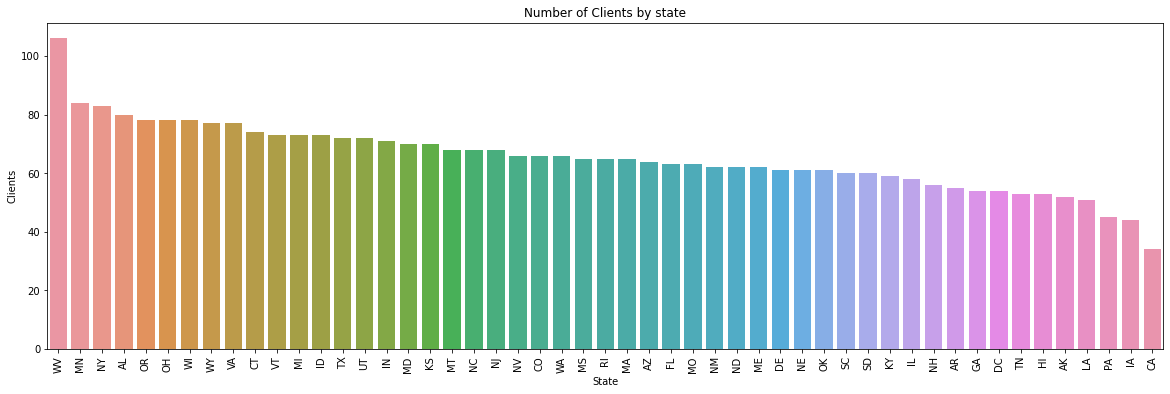

In [649]:
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='state', data=df, order=df['state'].value_counts().index)

plt.title('Number of Clients by state')
plt.xlabel('State')
plt.ylabel('Clients')

plt.xticks(rotation=90)
plt.show()

### Multicollinearity

In order to detect multicollinearity we make a matrix of Pearson correlation coefficients among the predictor variables. High correlation coefficients (e.g., above 0.75) suggest multicollinearity.

We need to avoid multicollinearity because it can lead to unreliable and unstable estimates of regression coefficients, making it difficult to determine the effect of each independent variable on the dependent variable. This can also result in inflated standard errors, leading to a higher chance of failing to identify significant variables.


In [650]:
#
numeric.corr()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_minutes,total_charge
account_length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,...,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541,-0.005080,0.000770
area_code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,...,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174,-0.006259,-0.007083
international_plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,...,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852,0.024422,0.045191
voice_mail_plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,...,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148,0.014542,0.008689
number_vmail_messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,...,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728,0.014688,0.009572
total_day_minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,...,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151,0.611800,0.886698
total_day_calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,...,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459,0.004889,0.002121
total_day_charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,...,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151,0.611804,0.886701
total_eve_minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,...,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796,0.560869,0.414508
total_eve_calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,...,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233,0.001927,0.008781


In [651]:
abs(numeric.corr()) > 0.75

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_minutes,total_charge
account_length,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
area_code,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
international_plan,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
voice_mail_plan,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
number_vmail_messages,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
total_day_minutes,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
total_day_calls,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
total_day_charge,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
total_eve_minutes,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
total_eve_calls,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


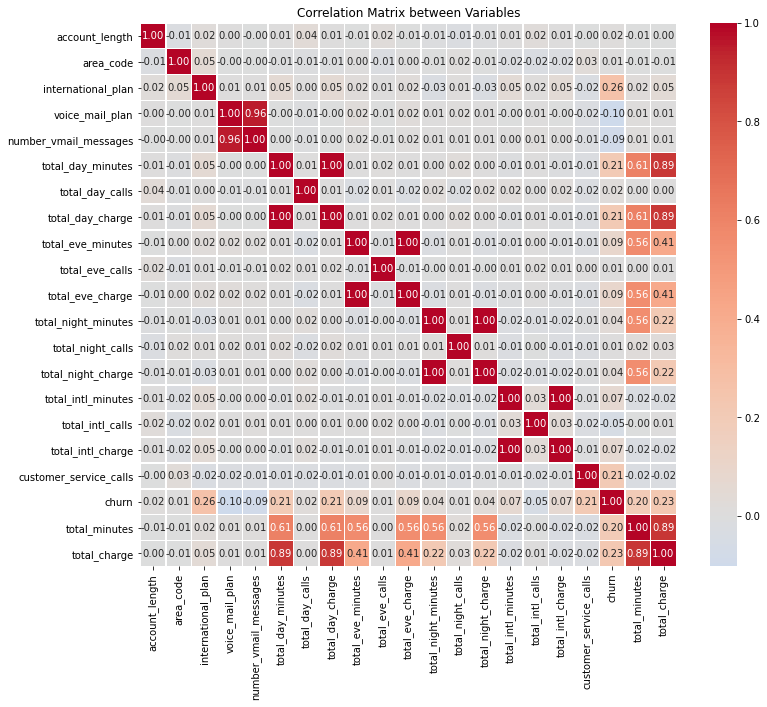

In [652]:
# Calculate the correlation matrix
corr_matrix = numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix between Variables')
plt.show();

### Dropping Columns/Feature Selection

This makes a lot of sense!! Of course we would see multicollinearity between features such as ''total_day_charge' and 'total_day_minutes'. They're basically telling us the same thing.

Let's drop columns we already deemed irrelevant, such as total_day_calls. They have a low correlation with our target variable, **churn**, which makes sense: the *number* of calls made doesn't matter so much as the *duration* and *charges* associated with each particular call. 

There was a *chance* these could have been helpful - what if someone has to make multiple calls, because the call keeps dropping due to techinical difficulties? However, due to the low correlations we can drop these columns. Then run the correlation matrix again.

In [653]:
# Dropping from main and numeric dataframes
df.drop(columns=['total_day_calls', 'total_eve_calls', 'total_night_calls'], axis=1, inplace=True)

In [654]:
numeric.drop(columns=['total_day_calls', 'total_eve_calls', 'total_night_calls'], axis=1, inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Price-per-Minute Rate

We can drop columns related to charges, keeping the columns logging the number of 'minutes' spent on a call yet retain the information from both columns, if we create a **conversion rate** by determining how much a call costs per minute.

Let's first do for day, eve, and night, to make sure there's consistency of charge-per-minute depending on time of day.

In [655]:
# Calculating cost per minute by time of day
df['minute_cost_day'] = df['total_day_charge'] / df['total_day_minutes']
df['minute_cost_eve'] = df['total_eve_charge'] / df['total_eve_minutes']
df['minute_cost_night'] = df['total_night_charge'] / df['total_night_minutes']

In [656]:
df['minute_cost_day'].describe()

count    3331.000000
mean        0.170003
std         0.000028
min         0.169231
25%         0.169989
50%         0.170004
75%         0.170017
max         0.170513
Name: minute_cost_day, dtype: float64

In [657]:
df['minute_cost_eve'].describe()

count    3332.000000
mean        0.085001
std         0.000016
min         0.084936
25%         0.084988
50%         0.085000
75%         0.085013
max         0.085075
Name: minute_cost_eve, dtype: float64

In [658]:
df['minute_cost_night'].describe()

count    3333.000000
mean        0.045000
std         0.000017
min         0.044828
25%         0.044988
50%         0.045000
75%         0.045013
max         0.045111
Name: minute_cost_night, dtype: float64

Fantastic!! All of our standard deviations are incredibly low, implying the data is tightly clustered around our means and very reliable.

We'll run this for international calls as well, then create a dictionary to use as a reference key, if we need to calculate the price of a phone call by the number of minutes it took.

In [659]:
df['minute_cost_intl'] = df['total_intl_charge']  / df['total_intl_minutes']
df['minute_cost_intl'].describe()

count    3315.000000
mean        0.270057
std         0.000329
min         0.268182
25%         0.269811
50%         0.270000
75%         0.270297
max         0.272727
Name: minute_cost_intl, dtype: float64

#### Creating Price-Per-Minute key

Let's create a "key", **ppm**, that we can refer to whenever we need to remember how much a phone call costs per minute, depending on time of day and whether or not the call was international. We'll use the mean values from our calculations above, given that our 'min-to-max' ranges and standard deviations were *very* small. 

In [660]:
# Creating dictionary with price-per-minute info
ppm = {
    'day_ppm': 0.17,
    'eve_ppm': 0.085,
    'night_ppm': 0.045,
    'intl_ppm': 0.27
}

In [661]:
# Adding this to our main 'keys' dictionary
keys['ppm'] = ppm

In [662]:
# Dropping columns from df
df.drop(columns=['minute_cost_day', 'minute_cost_eve', 'minute_cost_night', 'minute_cost_intl'], axis=1, inplace=True)

#### Takeaways

It looks like calls made during the day are by far more expensive than calls made during the evening, or night. International calls are also far more expensive, but that is expected.

### Dropping Columns

Now, we can drop the columns related to charges. 

In [663]:
# Dropping from main dataframe
df.drop(columns=['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'], axis=1, inplace=True)

There's multicollinearity between 'total_minutes' and 'total_charge'. For this particular metric, let's drop 'total_minutes'. We can calculate that based on our minutes info for each time of day, and it might be helpful to determine which customers paid more or less over the total time of their phone plan.

In [664]:
df.drop('total_minutes', axis=1, inplace=True)

In [665]:
numeric = df.select_dtypes(include=['float64','int64'])

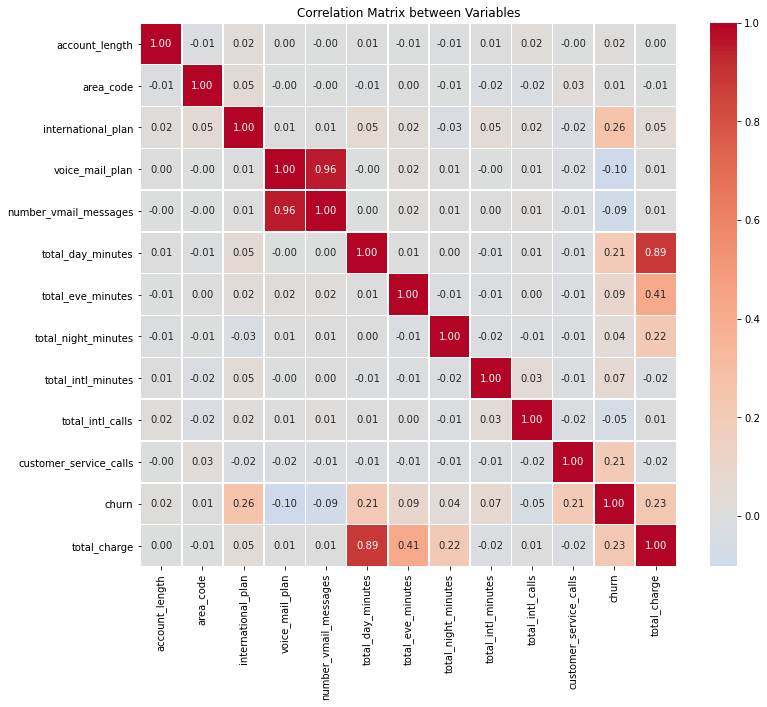

In [666]:
# Calculate the correlation matrix
corr_matrix = numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix between Variables')
plt.show();

Taking a closer second look...this matrix is super interesting. Our target variable 'churn' has a higher correlation with 'total_day_minutes' than the equivalent for evening or night calls...which makes sense given that we now know day phone-calls cost so much more.

However, we also know international phone calls are quite expensive, yet whether or not a person has an 'international_plan' seems to be far more impactful on churn than the 'total_intl_minutes' they spent calling. 

##### Intl # Calls vs. # Minutes

Furthermore, 'total_intl_minutes' has a positive correlation with churn, yet 'total_intl_calls' has a negative correlation.

Why is this?

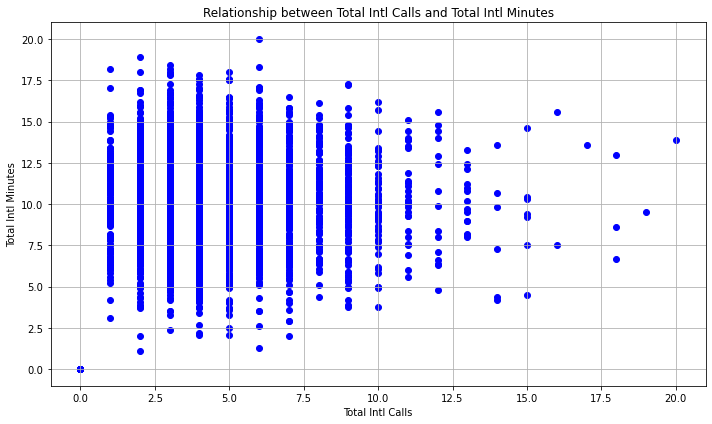

In [667]:
# Plotting number of intl calls compared to number of intl minutes

plt.figure(figsize=(10, 6))
plt.scatter(df['total_intl_calls'], df['total_intl_minutes'], marker='o', color='b')
plt.xlabel('Total Intl Calls')
plt.ylabel('Total Intl Minutes')
plt.title('Relationship between Total Intl Calls and Total Intl Minutes')
plt.grid(True)
plt.tight_layout()
plt.show()

Interesting...Clearly there are outliers. Most of our data here is for customers who made 1-10 international calls.

Because # of intl calls is a discrete variable, let's plot this on a normalized bar graph and see how it compares to our graph above.

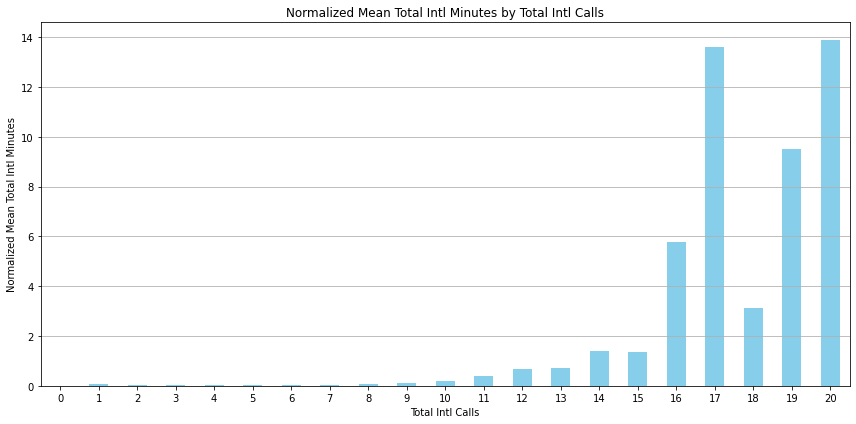

In [668]:
# Grouping data by 'total_intl_calls' and calculating the mean 'total_intl_minutes' for each group
intl_calls_means = df.groupby('total_intl_calls')['total_intl_minutes'].mean()

# Calculating value counts for 'total_intl_calls'
intl_calls_counts = df['total_intl_calls'].value_counts()

# Normalizing by dividing means by value counts
normalized_means = intl_calls_means / intl_calls_counts

# Plotting the normalized data
plt.figure(figsize=(12, 6))
normalized_means.plot(kind='bar', color='skyblue')
plt.xlabel('Total Intl Calls')
plt.ylabel('Normalized Mean Total Intl Minutes')
plt.title('Normalized Mean Total Intl Minutes by Total Intl Calls')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines on the y-axis
plt.tight_layout()
plt.show()

In [669]:
df['total_intl_calls'].value_counts(normalize=True)

3     0.200420
4     0.185719
2     0.146715
5     0.141614
6     0.100810
7     0.065407
1     0.048005
8     0.034803
9     0.032703
10    0.015002
11    0.008401
0     0.005401
12    0.004500
13    0.004200
15    0.002100
14    0.001800
18    0.000900
16    0.000600
19    0.000300
17    0.000300
20    0.000300
Name: total_intl_calls, dtype: float64

It doesn't look like there's an issue of international calls "cutting out" due to technical difficulties, leading to a higher frequency of calls that need to be made to complete a conversation.

We can therefore **drop total_intl_calls**.

In [670]:
df.drop('total_intl_calls', axis=1, inplace=True)

Furthermore, if we remember back from our data understanding...most of our customers did **not** purchase an international plan...yet this is highly correlated with churn. Let's take a look at the numbers again.

In [671]:
df['churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

In [672]:
df['international_plan'].value_counts(normalize=True)

0    0.90309
1    0.09691
Name: international_plan, dtype: float64

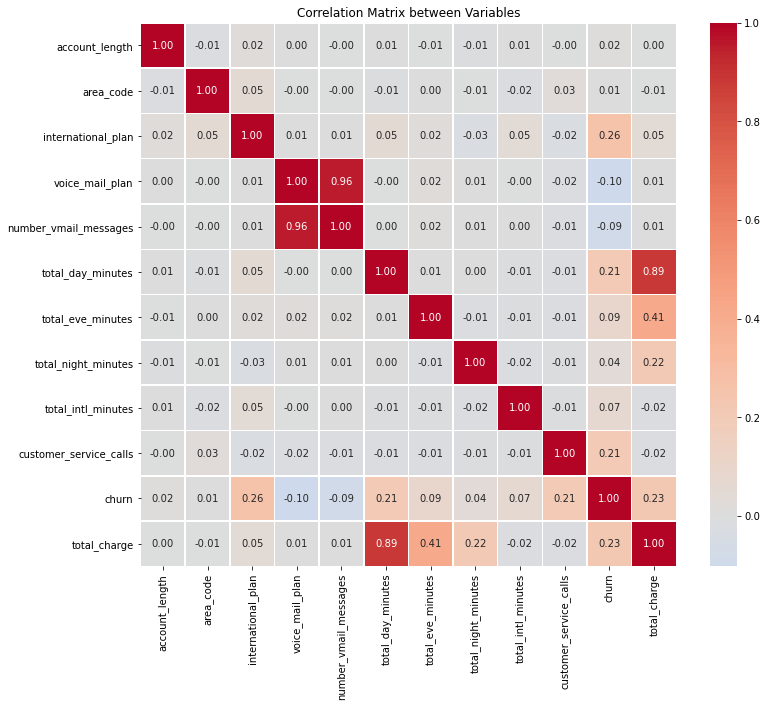

In [673]:
numeric = df.select_dtypes(include=['float64','int64'])
# Calculate the correlation matrix
corr_matrix = numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix between Variables')
plt.show();

# Logistic Regression

#### Imbalanced Dataset: SMOTE

Let's start running regression models, and see if this helps us better understand our data. 

Because our data is **imbalanced** with regards to our target variable 'churn', let's use SMOTE to handle this imbalance.

In [674]:
# Assuming 'numeric' is your dataframe with numeric features and 'churn' is the target variable

# Split data into features (X) and target variable (y)
X = numeric.drop('churn', axis=1)  # Features
y = numeric['churn']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Explore target column breakdown in train data

In [675]:
# Code to explore
y_train.value_counts(normalize=True)

0    0.856714
1    0.143286
Name: churn, dtype: float64

How accurate would that baseline be on test data?

In [676]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.848576
1    0.151424
Name: churn, dtype: float64

In [677]:
# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [678]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

##### Logistic Regression

Regularization Strength - Identifying C value.

Let's start with the default of C=1.0. If our dataset is noisy or complex, and we suspect underfitting, we can increase C and allow the model to fit the training data more closely. If we suspect overfitting, the opposite will be true.

solver = 'lbfgs' (default max_iter of 100). 

In [679]:
y_train_smote.value_counts()

1    2284
0    2284
Name: churn, dtype: int64

In [680]:
# Initialize logistic regression model
logreg = LogisticRegression(solver='lbfgs', random_state=42)

### Finding Best Parameters Using Cross-Validation Grid Search

In [681]:
param_grid = {'C': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train_smote, y_train_smote)

# Evaluate best model
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       566
           1       0.41      0.80      0.54       101

    accuracy                           0.79       667
   macro avg       0.68      0.80      0.70       667
weighted avg       0.87      0.79      0.82       667



In [682]:
# Access best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 0.1}


In [683]:
# Apply logistic regression using optimal parameters

In [684]:
# Create logistic regression with C=0.1
logreg = LogisticRegression(C=0.1, solver='lbfgs', random_state=42)

# Fit the model on the training data
logreg.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       566
           1       0.41      0.80      0.54       101

    accuracy                           0.79       667
   macro avg       0.68      0.80      0.70       667
weighted avg       0.87      0.79      0.82       667



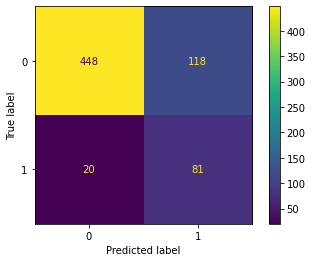

In [685]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test)

In [686]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       566
           1       0.41      0.80      0.54       101

    accuracy                           0.79       667
   macro avg       0.68      0.80      0.70       667
weighted avg       0.87      0.79      0.82       667



### Logistic Regression: Model Interpretation

***Confusion Matrix***...

TN (True Negative): 382 predicted no-churn (0), and actually no-churn (1)

FP (False Positive): 184 predicted churn (1) but actually no-churn (0)

FN (False Negative): 13 predicted no-churn (0) but actually churn (1)

TP (True Positive): 88 predicted churn (1) and actually churn (1)


***Classification Report***...

Precision (ratio correctly predicited positive to total predicted positive)...for no-churn (0) it's 0.97. For churn (1), it's 0.32.

Recall (ratio correctly predicted positive observations to all observations in actual class)...for no-churn (0) it's 0.67. For churn (1) it's 0.87.

F1-score ("harmonic mean of precision and recall")...for no-churn (0) it's 0.80, for churn (1) it's 0.47

Accuracy (proportion of correctly predicted instances out of total instances)


High no-churn (0) precision, but lower recall for churn (1) indicates this model might correctly ideintify no-churn customers more often than churn one. Our lower F1-score for churn (1), further indicates there's room for improvement in predicting churned customers.


Hyperparameter Tuning - Cross Validation

### Calculate ROC-AUC

In [687]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = logreg.predict_proba(X_test_scaled)[:,1]

roc_auc_score(y_test, test_probas)

0.833922261484099

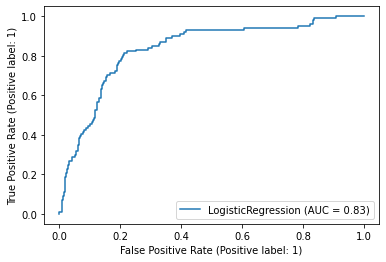

In [688]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test);

# Decision Tree

We'll account for an imbalance in our dataset using class_weight.

In [689]:
# Initialize Decision Tree model
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Predict on the original testing data
y_pred = dt.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       566
           1       0.77      0.76      0.77       101

    accuracy                           0.93       667
   macro avg       0.86      0.86      0.86       667
weighted avg       0.93      0.93      0.93       667



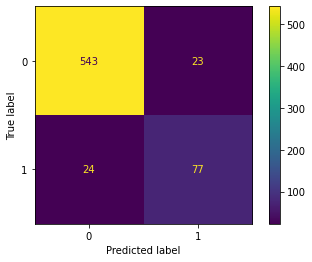

In [690]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

In [691]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       566
           1       0.77      0.76      0.77       101

    accuracy                           0.93       667
   macro avg       0.86      0.86      0.86       667
weighted avg       0.93      0.93      0.93       667



In [692]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = dt.predict_proba(X_test)[:,1]

roc_auc_score(y_test, test_probas)

0.8608700976104677

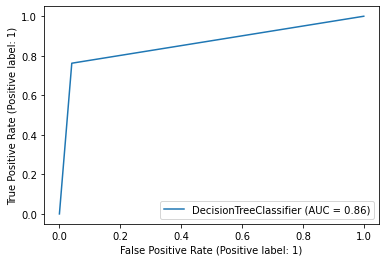

In [693]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(dt, X_test, y_test);

### Visualizing Decision Tree - Feature Importance

Let's use our decision tree model to figure out what features are most important in predicting our target variable. We can then visualize these features.

In [694]:
importances = dt.feature_importances_
feature_names = X_train.columns
feature_importance_pairs = list(zip(feature_names, importances))
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)  # Sort by importance
top_features = [pair[0] for pair in feature_importance_pairs[:5]]  # Select top 5 features

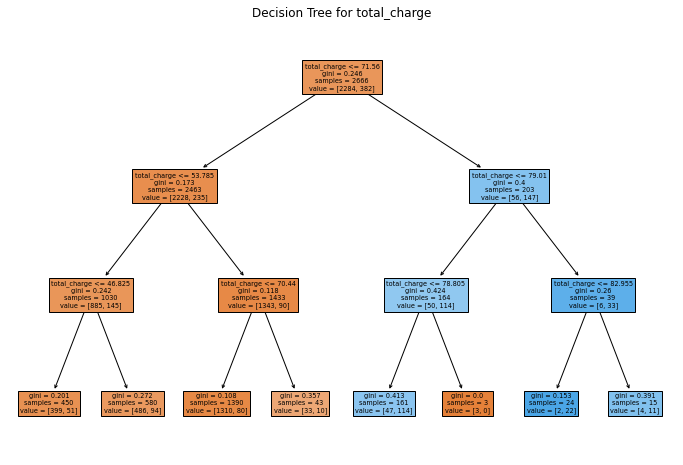

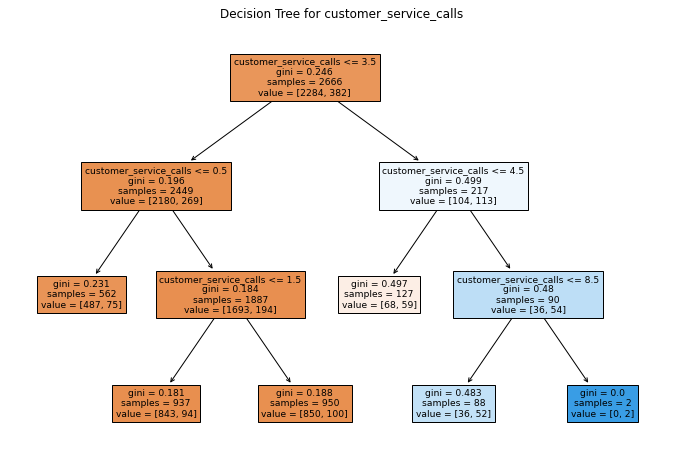

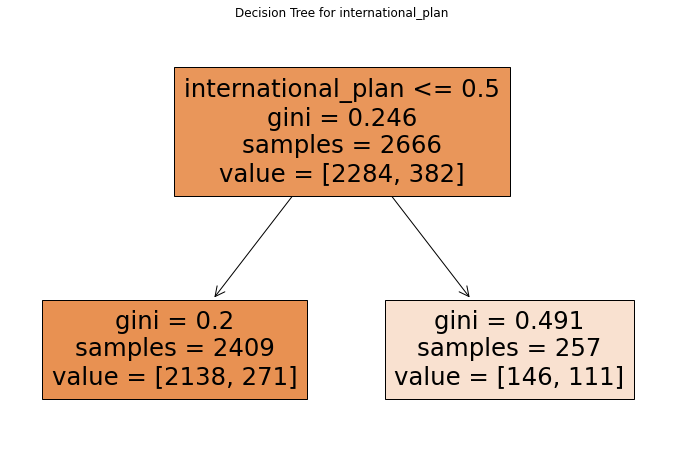

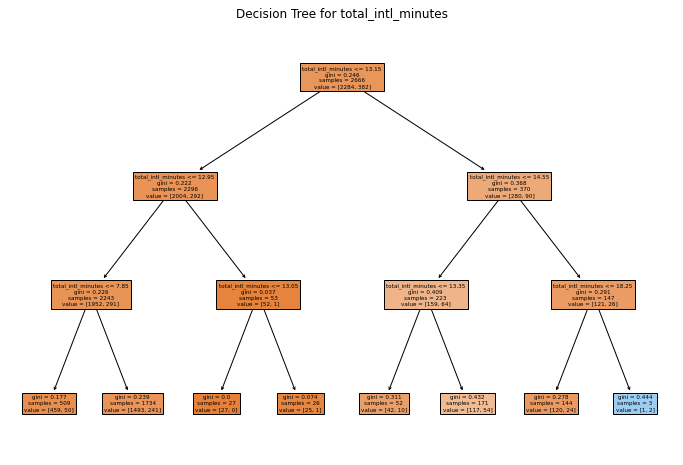

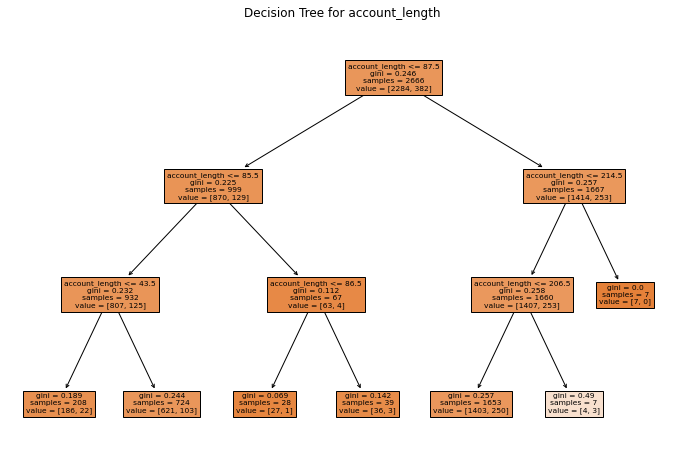

In [695]:
# Plot
for feature in top_features:
    plt.figure(figsize=(12, 8))
    dt = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limiting depth for clearer visualization
    dt.fit(X_train[[feature]], y_train)
    plot_tree(dt, feature_names=[feature], filled=True)
    plt.title(f"Decision Tree for {feature}")
    plt.show()

# Feature Tuning

This is really interesting, and makes a lot of sense when you think about it. At first glance, it might seem confusing that customers with a **lower** total_charge are **more** likely to churn. Same for total_intl_minutes, or number of customer_service_calls...these seem like features that would indicate higher financial distress and/or greater technical difficulties for a person, which would in turn seem to predict churn.

However, **if a person does churn, they are likely to have lower account_length, which would make for lower numbers in all other numeric features**. We need to create new features that account for this, then run these models again.

### New Dataframe, with Normalized Features accounting for differences in account_length.

Let's create a new dataframe, with columns that account for differences in account length.

In [696]:
# Creating dataframe with normalized columns by account_length
norm_df = df.copy()
norm_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,customer_service_calls,churn,prefix,total_charge
0,KS,128,415,0,1,25,265.1,197.4,244.7,10.0,1,0,382,72.86
1,OH,107,415,0,1,26,161.6,195.5,254.4,13.7,1,0,371,55.54
2,NJ,137,415,0,0,0,243.4,121.2,162.6,12.2,0,0,358,59.00
3,OH,84,408,1,0,0,299.4,61.9,196.9,6.6,2,0,375,65.02
4,OK,75,415,1,0,0,166.7,148.3,186.9,10.1,3,0,330,49.36


In [697]:
# Shortening column names for clarity - remembering we are only focusing on the total 'minutes' per time of day, 
# since we can calculate the total charge 
#Finding percentage of minutes allotted to different times of day
norm_df['total_minutes'] = norm_df['total_day_minutes'] + norm_df['total_eve_minutes'] + norm_df['total_night_minutes']

norm_df['perc_daymin'] = norm_df['total_day_minutes'] / norm_df['total_minutes']

norm_df['perc_evemin'] = norm_df['total_eve_minutes'] / norm_df['total_minutes']

norm_df['perc_nightmin'] = norm_df['total_night_minutes'] / norm_df['total_minutes']

#Finding average number of intl minutes a day
norm_df['avg_intlmin_daily'] = norm_df['total_intl_minutes'] / norm_df['account_length']

### Customer Service Calls & Vmail Messages -- Per Week

For a feature such as customer_service_calls, it will be more helpful for our stakeholders if we normalize by account_length by calculating the average number of customer service calls across a larger span of time. It's very rare that someone makes multiple customer service calls a day. 

We'll first try to find the average customer service calls made **weekly** by a customer. We can adjust depending on how helpful our numbers are.

We'll do the same for voicemail messages. As these are also far less-frequent per-day than "number of minutes" spent on a call. 

In [698]:
# Make a new column calculating the number of weeks a customer was active
norm_df['weeks_active'] = norm_df['account_length'] / 7

norm_df['avg_custservice_weekly'] = norm_df['customer_service_calls'] / norm_df['weeks_active']

norm_df['avg_vmail_weekly'] = norm_df['number_vmail_messages'] / norm_df['weeks_active']

### Comparing Customer Engagement

It will be helpful, from a predictive standpoint, to give our stakeholders the ability to compare a customer's activity (ex. minutes spent on the phone per day) with the average customer activity...that way we can take new customers and determine how likely they are to churn or not-churn depending on where they fall in comparison to the rest of the customer base.

We can do this by calculating the average total_minutes spent calling by all the rows in our dataframe...then calculate each individual customer's standard deviation away from this mean.

In [699]:
# Average minutes a day depending on time of day
norm_df['avg_daymin_daily'] = norm_df['total_day_minutes'] / norm_df['account_length']

norm_df['avg_evemin_daily'] = norm_df['total_eve_minutes'] / norm_df['account_length']

norm_df['avg_nightmin_daily'] = norm_df['total_night_minutes'] / norm_df['account_length']

norm_df['avg_totalmin_daily'] = norm_df['avg_daymin_daily'] + norm_df['avg_evemin_daily'] + norm_df['avg_nightmin_daily']

# Calculating mean of total_minutes for entire dataframe
mean_total_minutes = norm_df['avg_totalmin_daily'].mean()

# Calculate the deviation from the mean 
norm_df['calltime_deviation_from_mean'] = norm_df['avg_totalmin_daily'] - mean_total_minutes

Let's do the same thing for our other normalized columns - perc_intlmin_daily, cust_service_norm, and num_vmail_norm

In [700]:
# Calculating percentage international minutes a day
mean_intl_minutes = norm_df['avg_intlmin_daily'].mean()
norm_df['intlmin_deviation_from_mean'] = norm_df['avg_intlmin_daily'] - mean_intl_minutes

# Customer service calls per week deviation
mean_weekly_custservice = norm_df['avg_custservice_weekly'].mean()
norm_df['custservice_weekly_deviation'] = norm_df['avg_custservice_weekly'] - mean_weekly_custservice

# Number voicemails per week deviation
mean_weekly_vmail = norm_df['avg_vmail_weekly'].mean()
norm_df['vmail_weekly_deviation'] = norm_df['avg_vmail_weekly'] - mean_weekly_vmail

In [701]:
norm_df.drop('total_day_minutes', axis=1, inplace=True)
norm_df.drop('total_eve_minutes', axis=1, inplace=True)
norm_df.drop('total_night_minutes', axis=1, inplace=True)
norm_df.drop('total_intl_minutes', axis=1, inplace=True)
norm_df.drop('customer_service_calls', axis=1, inplace=True)
norm_df.drop('number_vmail_messages', axis=1, inplace=True)

In [702]:
norm_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,churn,prefix,total_charge,total_minutes,perc_daymin,...,avg_custservice_weekly,avg_vmail_weekly,avg_daymin_daily,avg_evemin_daily,avg_nightmin_daily,avg_totalmin_daily,calltime_deviation_from_mean,intlmin_deviation_from_mean,custservice_weekly_deviation,vmail_weekly_deviation
0,KS,128,415,0,1,0,382,72.86,707.2,0.374859,...,0.054688,1.367188,2.071094,1.542188,1.911719,5.525000,-3.602896,-0.078866,-0.117001,0.431033
1,OH,107,415,0,1,0,371,55.54,611.5,0.264268,...,0.065421,1.700935,1.510280,1.827103,2.377570,5.714953,-3.412943,-0.028954,-0.106268,0.764780
2,NJ,137,415,0,0,0,358,59.00,527.2,0.461684,...,0.000000,0.000000,1.776642,0.884672,1.186861,3.848175,-5.279721,-0.067940,-0.171688,-0.936155
3,OH,84,408,1,0,0,375,65.02,558.2,0.536367,...,0.166667,0.000000,3.564286,0.736905,2.344048,6.645238,-2.482658,-0.078420,-0.005022,-0.936155
4,OK,75,415,1,0,0,330,49.36,501.9,0.332138,...,0.280000,0.000000,2.222667,1.977333,2.492000,6.692000,-2.435896,-0.022325,0.108312,-0.936155


Let's look at our state breakdown with these new normalized numbers.

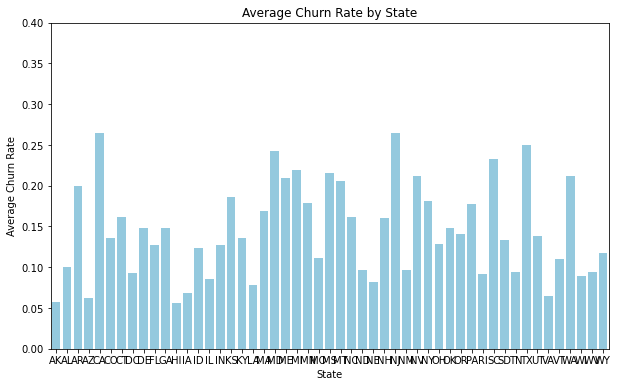

In [703]:
# Calculate average churn rate by state
avg_churn_by_state = norm_df.groupby('state')['churn'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='churn', data=avg_churn_by_state, color='skyblue')
plt.title('Average Churn Rate by State')
plt.xlabel('State')
plt.ylabel('Average Churn Rate')
plt.ylim(0.0, 0.4)  # Set y-axis limit
plt.show()

### Minutes VS. Charge

Let's revisit our decision to drop total_minutes as opposed to total_charge. On second thought, this wasn't a great idea because total_charge is helpful in interpreting our predictions, but not making the predictions themselves...we're interested in *customer behavior* that predicts churn, not the outcome of this behavior (such as charge).

In [704]:
# Dropping total_charge
norm_df.drop('total_charge', axis=1, inplace=True)

#### Feature Selects

Let's make another dataframe norm_selects, with selections of all the features we think we might need to predict churn (ex. something like 'account_length' is not helpful, because this again is hindsight bias rather than a predictive variable).

In [705]:
norm_df.keys()

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'churn', 'prefix', 'total_minutes', 'perc_daymin',
       'perc_evemin', 'perc_nightmin', 'avg_intlmin_daily', 'weeks_active',
       'avg_custservice_weekly', 'avg_vmail_weekly', 'avg_daymin_daily',
       'avg_evemin_daily', 'avg_nightmin_daily', 'avg_totalmin_daily',
       'calltime_deviation_from_mean', 'intlmin_deviation_from_mean',
       'custservice_weekly_deviation', 'vmail_weekly_deviation'],
      dtype='object')

In [706]:
norm_selects = norm_df.drop(columns=['account_length', 'weeks_active'], axis=1)

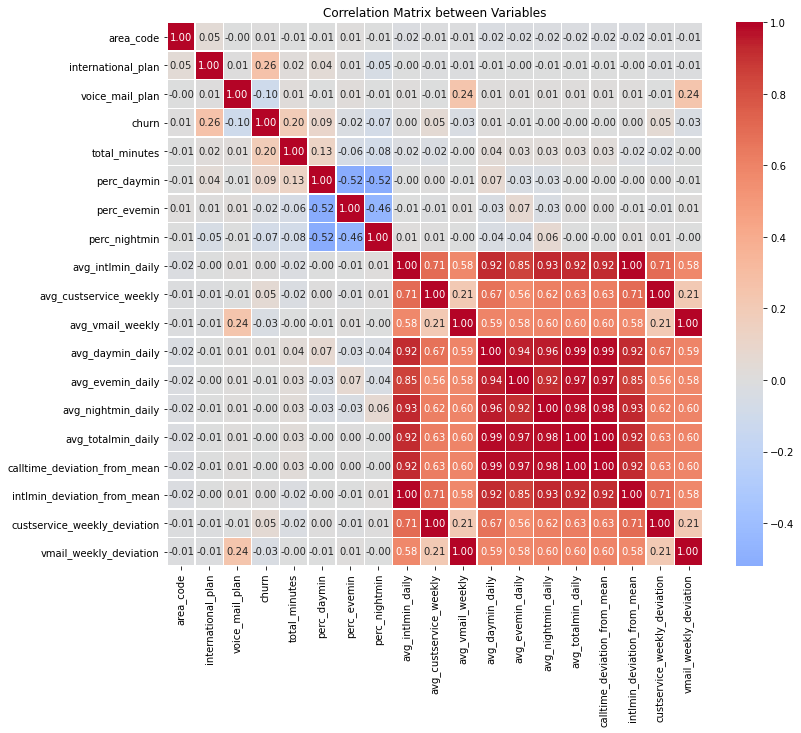

In [707]:
# Plotting correlation matrix with normalized data
norm_numeric = norm_selects.select_dtypes(include=['float64','int64'])
# Calculate the correlation matrix
corr_matrix = norm_numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix between Variables')
plt.show();

### Lack of Target Variable Correlation

Our new normalized features seem to have very minimal correlation with our target variable, 'churn'. This could be because they have complex, non-linear relationships. Let's use decision trees again. 

We need to account for imbalanced data. We'll use class_weight.

In [708]:
# X contains your features, and y is your target variable
X = norm_numeric.drop('churn', axis=1)
y = norm_numeric['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree model
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Predict on the testing data
y_pred = dt.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       566
           1       0.59      0.56      0.58       101

    accuracy                           0.87       667
   macro avg       0.76      0.75      0.75       667
weighted avg       0.87      0.87      0.87       667



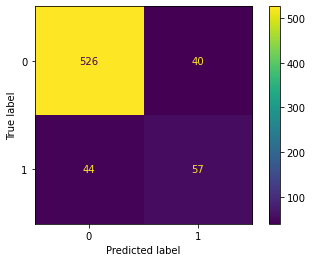

In [709]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

In [710]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       566
           1       0.59      0.56      0.58       101

    accuracy                           0.87       667
   macro avg       0.76      0.75      0.75       667
weighted avg       0.87      0.87      0.87       667



In [711]:
importances = dt.feature_importances_
feature_names = X_train.columns
feature_importance_pairs = list(zip(feature_names, importances))
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)  # Sort by importance
top_features = [pair[0] for pair in feature_importance_pairs[:5]]  # Select top 5 features

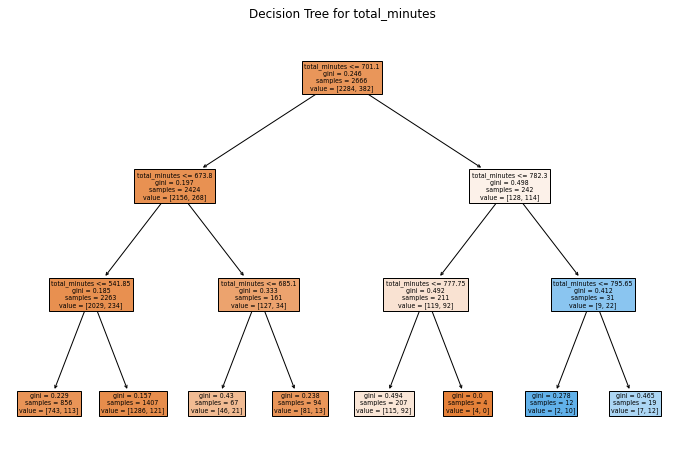

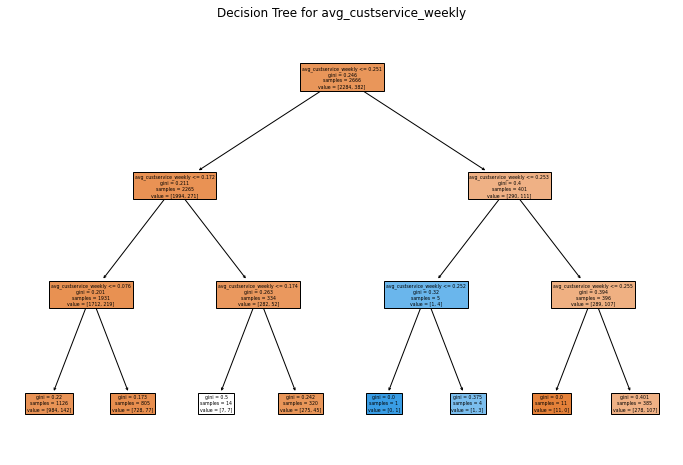

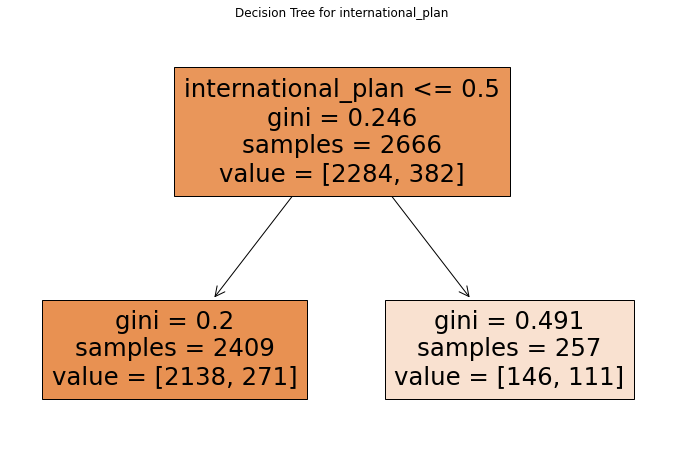

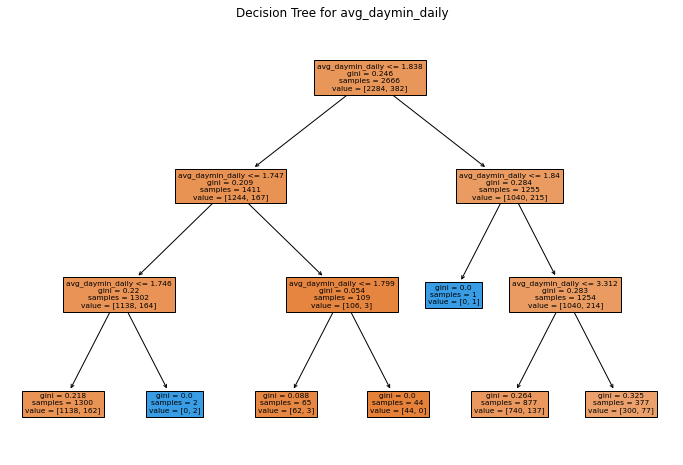

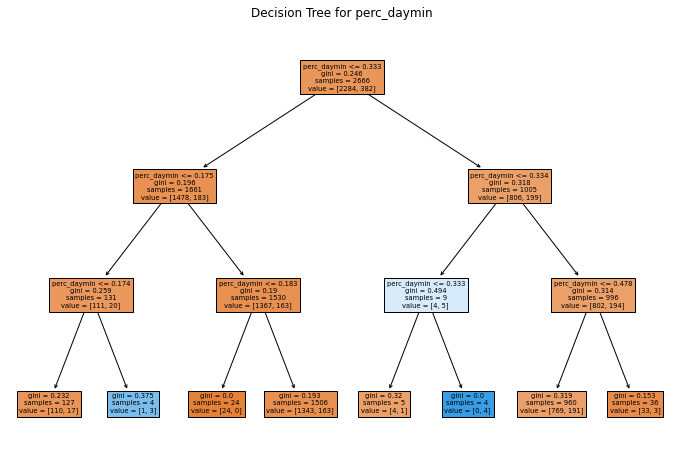

In [712]:
# Plot
for feature in top_features:
    plt.figure(figsize=(12, 8))
    dt = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limiting depth for clearer visualization
    dt.fit(X_train[[feature]], y_train)
    plot_tree(dt, feature_names=[feature], filled=True)
    plt.title(f"Decision Tree for {feature}")
    plt.show()

# Feature Importance 

Let's try and find our most important features. We can apply this to a few different models.

In [713]:
# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
print("Top 10 Most Important Features:")
print(feature_importances_df.head(10))

Top 10 Most Important Features:
                         Feature  Importance
3                  total_minutes    0.218009
8         avg_custservice_weekly    0.132755
1             international_plan    0.115031
10              avg_daymin_daily    0.094383
4                    perc_daymin    0.082893
12            avg_nightmin_daily    0.063078
9               avg_vmail_weekly    0.042385
5                    perc_evemin    0.042029
14  calltime_deviation_from_mean    0.039274
6                  perc_nightmin    0.037287


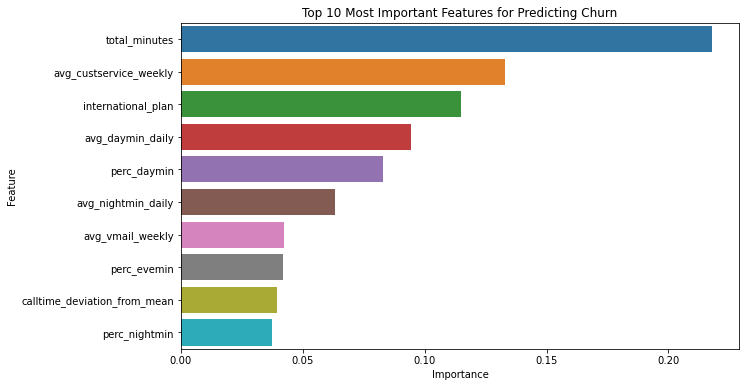

In [714]:
# Visualize

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(10))
plt.title('Top 10 Most Important Features for Predicting Churn')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Random Forest

Let's try with a Random Forest model. Accounting for imbalanced data once again with class_weight.

In [715]:
# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
print("Top 10 Most Important Features:")
print(feature_importances_df.head(10))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       566
           1       0.93      0.43      0.59       101

    accuracy                           0.91       667
   macro avg       0.92      0.71      0.77       667
weighted avg       0.91      0.91      0.89       667

Top 10 Most Important Features:
                         Feature  Importance
3                  total_minutes    0.185715
1             international_plan    0.088847
16  custservice_weekly_deviation    0.082543
8         avg_custservice_weekly    0.079418
4                    perc_daymin    0.076546
6                  perc_nightmin    0.059110
10              avg_daymin_daily    0.058475
13            avg_totalmin_daily    0.047639
12            avg_nightmin_daily    0.047307
15   intlmin_deviation_from_mean    0.043272


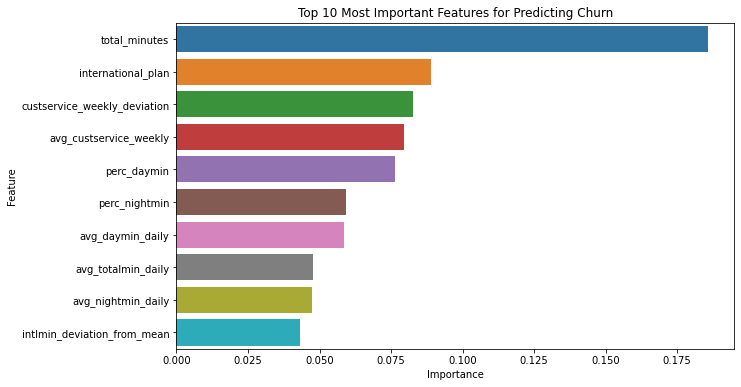

In [716]:
# Visualize most important features

# Get feature importances from the trained Random Forest model
importances = rf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plotting the top N most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(10))
plt.title('Top 10 Most Important Features for Predicting Churn')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Random Forest is usually more reliable for feature selection than Decision Tree. Here is a breakdown of some of the depicted features above:

**perc_custservice_weekly**: Let's drop 'perc_custservice_weekly', since it correlates with 'custservice_weekly_deviation'. Both had correlations of 0.5 with 'churn' in our correlation matrix, yet the latter was identified as more important in both our Decision Tree and Random Forest exploration.

**per_daymin_daily**: This seems to be our most important feature, which makes sense given that we know 'total_charge' was highly correlated with 'churn' and that daytime calls cost more than calls made in eve or night. We'll focus on 'perc_daymin_daily', and drop the equivalent values for eve and night, since day calls are indicative of higher charges as well. We'll keep 'perc_totalmin_daily', to still account for evening and night calls.

**international data**: It's unclear whether 'intlmin_deviation_from_mean' or 'perc_intlmin_daily' will be more helpful. We'll keep both for now.

In [717]:
# Dropping columns from norm_selects
norm_selects = norm_selects.drop(columns=['avg_custservice_weekly', 'avg_nightmin_daily', 'avg_evemin_daily', 'avg_daymin_daily', 'perc_evemin', 'perc_nightmin'], axis=1)

#Resablishing our numeric data
norm_numeric = norm_selects.select_dtypes(include=['float64','int64'])

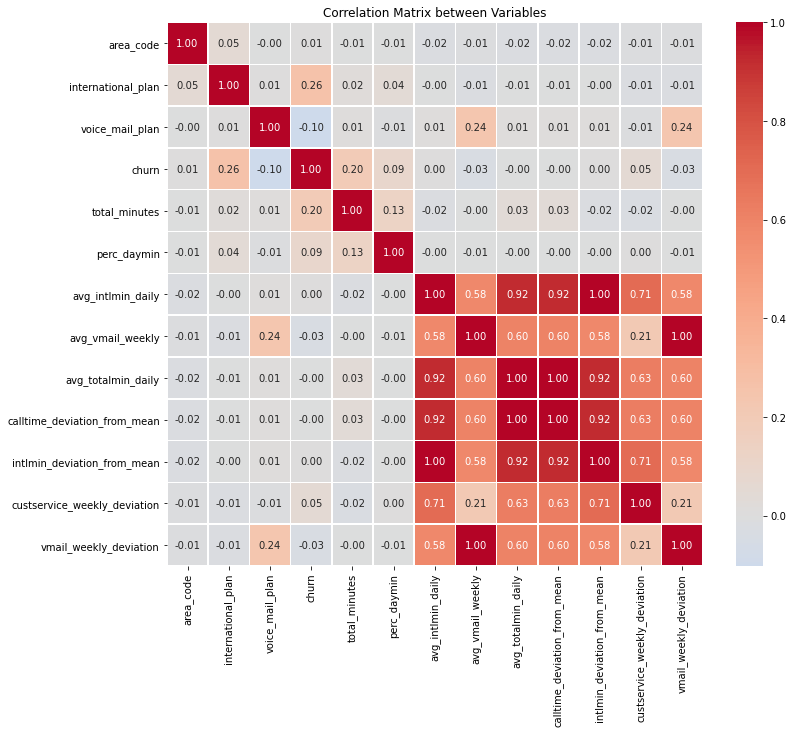

In [718]:
# Plotting correlation matrix with normalized data
norm_numeric = norm_selects.select_dtypes(include=['float64','int64'])
# Calculate the correlation matrix
corr_matrix = norm_numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix between Variables')
plt.show();

## Multicollinearity - Correlation Analysis, VIF and Lasso

We want to try logistic regression again, with our new normalized features. However, there's a huge risk of multicollinearity, with the strength of correlation between our predictor variables.

We can use VIF (Variance Inflation Factor) to measure how much the variance of regression coefficients are inflated because of collinearity with other predictor variables.

Lasso Regression will then penalize the absolute size of regression coefficients, which help shrink less important predictors towards zero.

Remember that our variables might **simply have a non-linear relationship**, in which case a model like Decision Tree or Random Forest will be more useful than logistic regression. However, we'll toy with our feature selection and correlation coefficients a little more before concluding whether logistic regression is a useful (or not) model.

In [719]:
# Selecting features to run logistic regression based on correlation matrix
logreg_selects = norm_selects
logreg_selects.drop(columns=['avg_intlmin_daily', 'avg_totalmin_daily', 'calltime_deviation_from_mean', 'intlmin_deviation_from_mean'], axis=1, inplace=True)

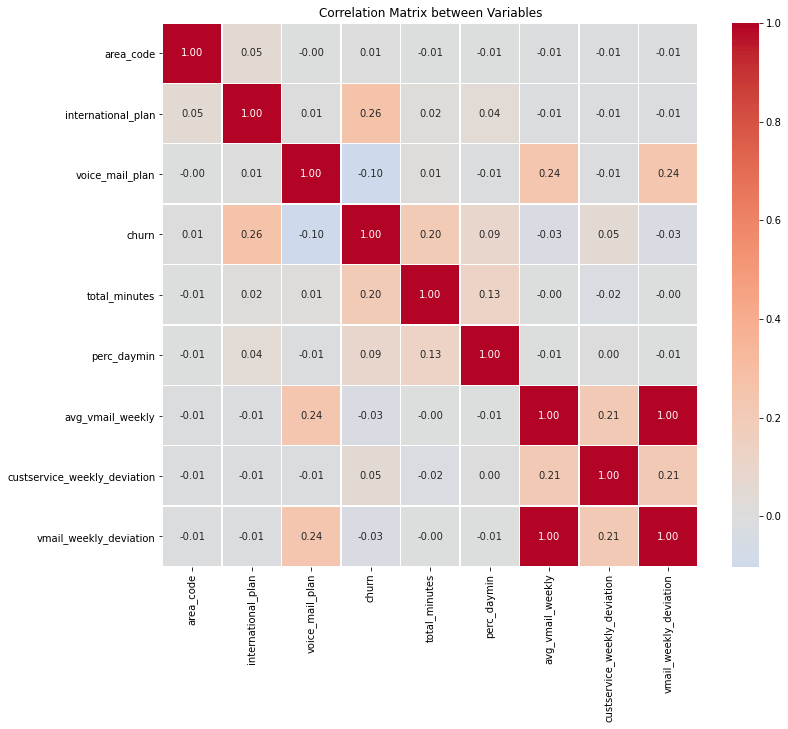

In [720]:
# Plotting correlation matrix with normalized data
logreg_selects = logreg_selects.select_dtypes(include=['float64','int64'])
# Calculate the correlation matrix
corr_matrix = logreg_selects.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix between Variables')
plt.show();

In [721]:
# Splitting into X (features) and y (target variable)
X = logreg_selects.drop('churn', axis=1)
y = logreg_selects['churn']

# Calculate VIF for each feature in X
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_df = calculate_vif(X)
print("Variance Inflation Factors:")
print(vif_df)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform Lasso Regression
lasso = Lasso(alpha=0.01)  # Lowered alpha because of initial lack of features
lasso.fit(X_train_scaled, y_train)

# Evaluate Lasso Model
y_pred = lasso.predict(X_test_scaled)
y_pred_class = np.where(y_pred > 0.5, 1, 0)  # Assuming threshold of 0.5
print("Classification Report:")
# Zero division parameter to account for warning
print(classification_report(y_test, y_pred_class, zero_division=1))

# Selected Features by Lasso
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features by Lasso:")
print(selected_features)

Variance Inflation Factors:
                        Feature          VIF
0                     area_code     1.002646
1            international_plan     1.004998
2               voice_mail_plan     1.066604
3                 total_minutes     1.018788
4                   perc_daymin     1.019394
5              avg_vmail_weekly  7369.492355
6  custservice_weekly_deviation     1.053126
7        vmail_weekly_deviation  7209.193698
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       1.00      0.01      0.02       101

    accuracy                           0.85       667
   macro avg       0.92      0.50      0.47       667
weighted avg       0.87      0.85      0.78       667

Selected Features by Lasso:
Index(['international_plan', 'voice_mail_plan', 'total_minutes', 'perc_daymin',
       'custservice_weekly_deviation'],
      dtype='object')


We need to drop either perc_vmail_weekly or vmail_weekly_deviation. Let's choose to keep vmail_weekly_deviation.

In [722]:
logreg_selects.drop('avg_vmail_weekly', axis=1, inplace=True)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Running Logistic Regression - Selected Features

Let's run logistic regression again, now with our feature selects. 

#### One Hot Encode area code

We'll want to one hot encode our three categorical area_code values.

In [723]:
# One Hot Encode area code 

categorical_cols = ['area_code']

# Perform one-hot encoding
logreg_selects_encoded = pd.get_dummies(logreg_selects, columns=categorical_cols, drop_first=True)

logreg_selects_encoded.head()

,international_plan,voice_mail_plan,churn,total_minutes,perc_daymin,custservice_weekly_deviation,vmail_weekly_deviation,area_code_415,area_code_510
0,0,1,0,707.2,0.374859,-0.117001,0.431033,1,0
1,0,1,0,611.5,0.264268,-0.106268,0.764780,1,0
2,0,0,0,527.2,0.461684,-0.171688,-0.936155,1,0
3,1,0,0,558.2,0.536367,-0.005022,-0.936155,0,0
4,1,0,0,501.9,0.332138,0.108312,-0.936155,1,0


In [724]:
# Convert to integers
logreg_selects_encoded['area_code_415'] = logreg_selects_encoded['area_code_415'].astype(int)
logreg_selects_encoded['area_code_510'] = logreg_selects_encoded['area_code_510'].astype(int)

logreg_selects_encoded.head()

,international_plan,voice_mail_plan,churn,total_minutes,perc_daymin,custservice_weekly_deviation,vmail_weekly_deviation,area_code_415,area_code_510
0,0,1,0,707.2,0.374859,-0.117001,0.431033,1,0
1,0,1,0,611.5,0.264268,-0.106268,0.764780,1,0
2,0,0,0,527.2,0.461684,-0.171688,-0.936155,1,0
3,1,0,0,558.2,0.536367,-0.005022,-0.936155,0,0
4,1,0,0,501.9,0.332138,0.108312,-0.936155,1,0


In [725]:
# Logistic Regression

X = logreg_selects_encoded.drop('churn', axis=1)
y = logreg_selects_encoded['churn']

# Standard Scaler
numeric_cols = X.columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [726]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Log regression
logreg = LogisticRegression(random_state=42)

In [727]:
# Finding best parameters using cross validation grid search
logreg = LogisticRegression(random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

y_pred = grid_search.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 10}
Accuracy: 0.7359649122807017
Confusion Matrix:
[[453 132]
 [169 386]]


In [728]:
# Fit logistic Regression with this C value
# Initialize Logistic Regression model with the best C value
logreg = LogisticRegression(C=1, max_iter=1000, random_state=42)

# Fit the model on training data
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)

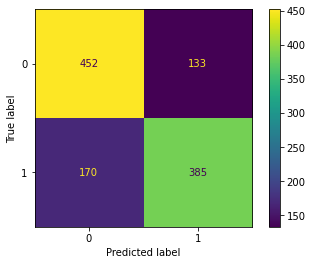

In [729]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

In [730]:
# Calculate precision, recall, f1-score, and support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       585
           1       0.74      0.69      0.72       555

    accuracy                           0.73      1140
   macro avg       0.73      0.73      0.73      1140
weighted avg       0.73      0.73      0.73      1140



## ROC-AUC

In [731]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = logreg.predict_proba(X_test)[:,1]

roc_auc_score(y_test, test_probas)

0.7673304073304074

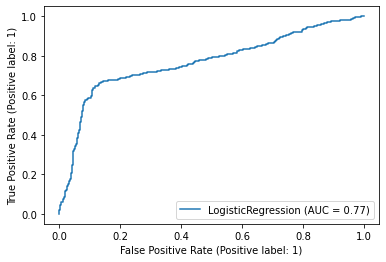

In [732]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(logreg, X_test, y_test);

# Worse Model

The logistic regression is a considerably worse model with our new normalized features. However, these features are much more helpful with regards to developing concrete customer behaviors and patterns that can predict churn without the need for hindsight bias.

Let's see how are other models, Decision Tree and Random Forest, do with these same normalized features.

# Decision Tree - Normalized Features

In [733]:
# Separate features (X) and target (y)
X = logreg_selects_encoded.drop('churn', axis=1)
y = logreg_selects_encoded['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate model
print("Decision Tree Classifier Performance:")
print(classification_report(y_test, y_pred_dt))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier Performance:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       566
           1       0.45      0.51      0.48       101

    accuracy                           0.83       667
   macro avg       0.68      0.70      0.69       667
weighted avg       0.84      0.83      0.84       667

Confusion Matrix:
[[502  64]
 [ 49  52]]


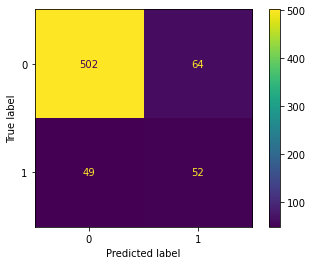

In [734]:
# Generate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Display confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_classifier.classes_)
disp_dt.plot()

In [735]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = dt_classifier.predict_proba(X_test)[:,1]

roc_auc_score(y_test, test_probas)

0.7008886401007592

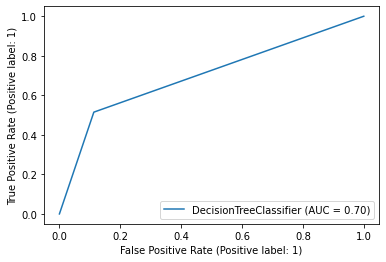

In [736]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(dt_classifier, X_test, y_test);

# Random Forest - Normalized Features

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       566
           1       0.73      0.48      0.57       101

    accuracy                           0.89       667
   macro avg       0.82      0.72      0.76       667
weighted avg       0.88      0.89      0.88       667

Confusion Matrix:
[[548  18]
 [ 53  48]]


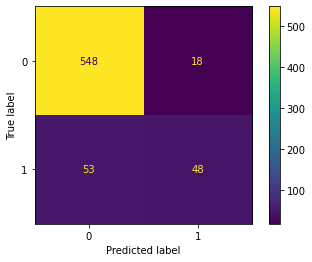

In [737]:
# Assuming you have split your data and trained the Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Predictions on test data
y_pred_rf = rf_classifier.predict(X_test)

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Evaluate model
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Display confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_classifier.classes_)
disp_rf.plot()

In [738]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = rf_classifier.predict_proba(X_test)[:,1]

roc_auc_score(y_test, test_probas)

0.8553860686421999

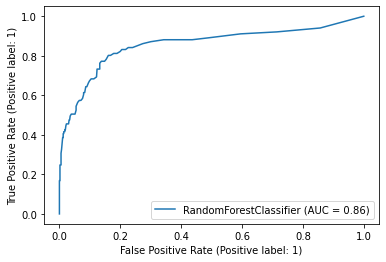

In [739]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(rf_classifier, X_test, y_test);

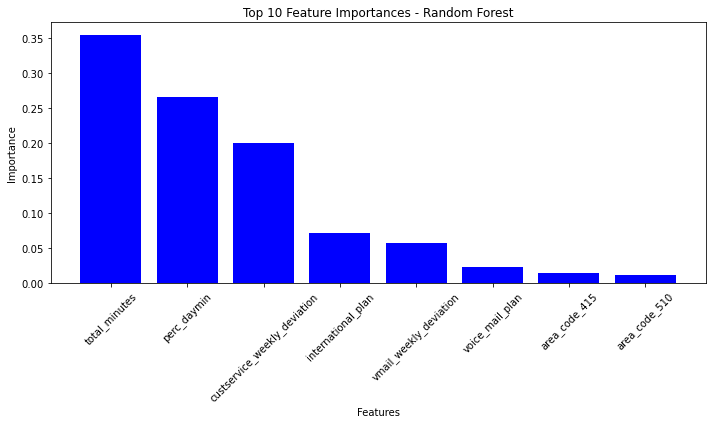

In [740]:
# Looking at feature importance

importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index[:10], feature_importances['Importance'].head(10), color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Poor Models - Need Further Tuning

Unfortunately, the models with our normalized features are doing a *way worse* job predicting whether a customer will churn, when comparing their results to our original regression model. 

Let's see what other feature tuning we can possibly explore. Else, we can visit our original non-normalized features, determine which ones have high predictability in relation to churn, then interpret them in "normalized contexts".

### Account Length 

We can try examining whether there are huge differences in the account_length values of churn and no-churn customers...then rather than building a metric of "day calls per day" or "customer service calls per week", we can create a threshold such as "If a customer makes a certain number of customer service calls by day **56** of their contract, they are more likely to churn.

Let's run the numbers below...

In [741]:
max_account_length_all = df['account_length'].max()
print(f"Max account_length in all rows: {max_account_length_all}")

max_account_length_churned = df.loc[df['churn'] == 1, 'account_length'].max()
print(f"Max account_length where churn is 1: {max_account_length_churned}")

Max account_length in all rows: 243
Max account_length where churn is 1: 225


In [742]:
mean_account_length_all = df['account_length'].mean()
print(f"Mean account_length in all rows: {mean_account_length_all}")

mean_account_length_nochurn = df.loc[df['churn'] == 0, 'account_length'].mean()
print(f"Mean account_length where churn is 0: {mean_account_length_nochurn}")

mean_account_length_churned = df.loc[df['churn'] == 1, 'account_length'].mean()
print(f"Mean account_length where churn is 1: {mean_account_length_churned}")

Mean account_length in all rows: 101.06480648064806
Mean account_length where churn is 0: 100.79368421052632
Mean account_length where churn is 1: 102.66459627329192


Unfortunately, there seems to be nothing useful for us here. 

## State - Chi-Squared

Let's examine the geographic information provided by the 'states' column in our original dataframe. We can use a **Chi-Square Test of Independence** to determine whether the state in which a customer resides is a valid predictor of churn. If this turns out to be the case, we can find a way to adjust our models with this geographic location in mind.

In [743]:
# df contains 'state' (categorical) and 'churn' (binary) columns
contingency_table = pd.crosstab(df['state'], df['churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 83.04379191019663
P-value: 0.002296221552011188


The high chi-square value, along with the low p-value (much lower than our alpha of 0.05), concludes there is a **significant relationship between state and churn**. 

Let's *plot the average churn per state* to get a better understanding of which states will be most influential in our model.

state
CA    0.264706
NJ    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
KS    0.185714
NY    0.180723
MN    0.178571
PA    0.177778
MA    0.169231
CT    0.162162
NC    0.161765
NH    0.160714
GA    0.148148
DE    0.147541
OK    0.147541
OR    0.141026
UT    0.138889
CO    0.136364
KY    0.135593
SD    0.133333
OH    0.128205
FL    0.126984
IN    0.126761
ID    0.123288
WY    0.116883
MO    0.111111
VT    0.109589
AL    0.100000
ND    0.096774
NM    0.096774
WV    0.094340
TN    0.094340
DC    0.092593
RI    0.092308
WI    0.089744
IL    0.086207
NE    0.081967
LA    0.078431
IA    0.068182
VA    0.064935
AZ    0.062500
AK    0.057692
HI    0.056604
Name: churn, dtype: float64


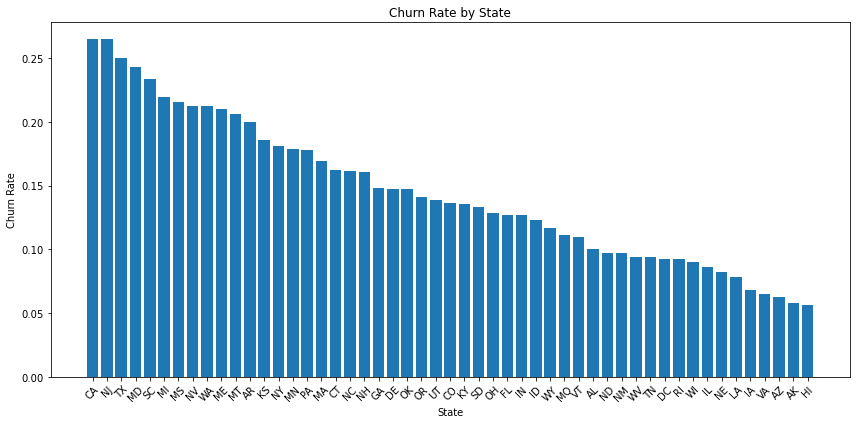

In [744]:
churn_rate_per_state = df.groupby('state')['churn'].mean().sort_values(ascending=False)
print(churn_rate_per_state)

# Plot churn rates
plt.figure(figsize=(12, 6))
plt.bar(churn_rate_per_state.index, churn_rate_per_state.values)
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by State')
plt.tight_layout()
plt.show()

### Binary Classification for States - High or Low Churn-Rate

One-hot-enconding all of the 51 states represented in our dataset might slow down, and add greater risk of multi-collinearity to our already complex model.


Instead, let's try developing a binary classification system, where we identify whether someone is calling from a state with a **high VS. low churn-rate**. 

We need to determine our threshold for high churn-rate vs. low churn-rate. Let's look at the average churn for our entire dataset, as well as the quantile breakdowns per state.

In [745]:
# Calculate average churn rate
average_churn_rate = df['churn'].mean()

print(f"Average churn rate: {average_churn_rate}")

Average churn rate: 0.14491449144914492


In [746]:
# Example: Determine quantiles for thresholding
quantiles = churn_rate_per_state.quantile([0.25, 0.5, 0.75])
print("Quantiles for churn rates:")
print(quantiles)

Quantiles for churn rates:
0.25    0.095557
0.50    0.136364
0.75    0.183219
Name: churn, dtype: float64


We'll actually have *three* classifications for churn rate by state: low (below the 25th percentile), medium (between the 25th percentile and the median), and high (above the median). 

We'll apply this to all of our dataframes we've had at play, for continuity.

Our encoded area_code information does not seem so helpful in hindsight. We'll drop the dataframe logreg_selects_encoded.

In [747]:
# Calculate churn rate percentiles
quantiles = df.groupby('state')['churn'].mean().quantile([0.25, 0.5, 0.75])

# Define thresholds based on quantiles
low_cr_threshold = quantiles[0.25]
med_cr_threshold = quantiles[0.5]
high_cr_threshold = quantiles[0.75]

# Function to categorize churn rate
def categorize_churn_rate(churn_rate):
    if churn_rate < low_cr_threshold:
        return 'low_cr_state'
    elif churn_rate < med_cr_threshold:
        return 'med_cr_state'
    else:
        return 'high_cr_state'

# Calculate mean churn rate for each state
state_churn_means = df.groupby('state')['churn'].mean()

# Apply categorization function to each state's churn rate
df['churn_category'] = df['state'].map(state_churn_means.apply(categorize_churn_rate))

# Create dummy variables for churn categories
churn_dummies = pd.get_dummies(df['churn_category']).astype(int)

# Concatenate dummies with original dataframe
df = pd.concat([df, churn_dummies], axis=1)

df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,customer_service_calls,churn,prefix,total_charge,churn_category,high_cr_state,low_cr_state,med_cr_state
0,KS,128,415,0,1,25,265.1,197.4,244.7,10.0,1,0,382,72.86,high_cr_state,1,0,0
1,OH,107,415,0,1,26,161.6,195.5,254.4,13.7,1,0,371,55.54,med_cr_state,0,0,1
2,NJ,137,415,0,0,0,243.4,121.2,162.6,12.2,0,0,358,59.00,high_cr_state,1,0,0
3,OH,84,408,1,0,0,299.4,61.9,196.9,6.6,2,0,375,65.02,med_cr_state,0,0,1
4,OK,75,415,1,0,0,166.7,148.3,186.9,10.1,3,0,330,49.36,high_cr_state,1,0,0


In [748]:
# Drop med_cr_state to avoid multicollinearity
df.drop('med_cr_state', axis=1, inplace=True)

In [749]:
# Merge df with norm_df on their shared index
norm_df = norm_df.merge(df[['high_cr_state', 'low_cr_state']], how='left', left_index=True, right_index=True)

# Merge df with logreg_selects on their shared index
logreg_selects = logreg_selects.merge(df[['high_cr_state', 'low_cr_state']], how='left', left_index=True, right_index=True)

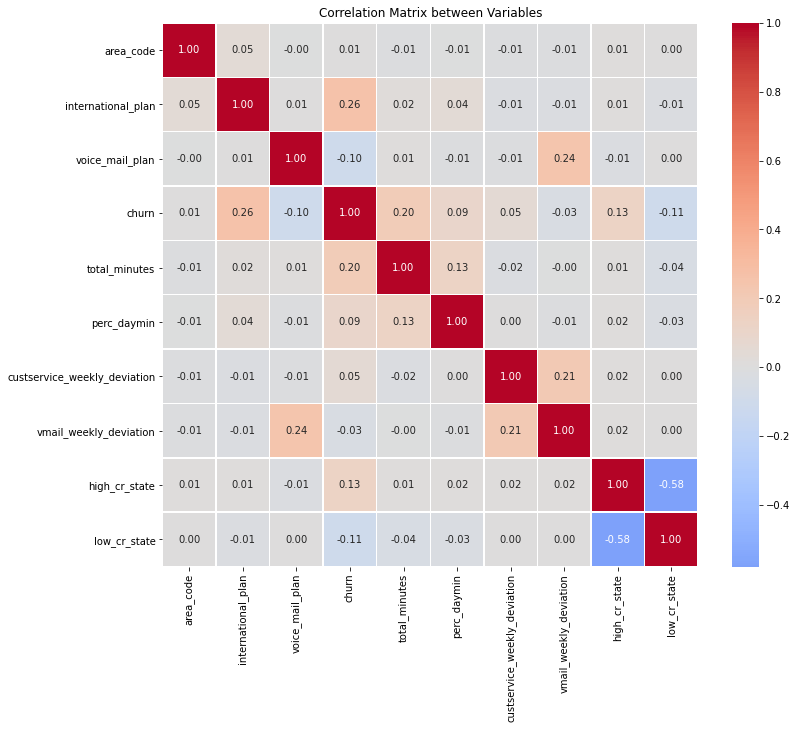

In [750]:
# Run new correlation matrix
logreg_selects = logreg_selects.select_dtypes(include=['float64','int64'])
# Calculate the correlation matrix
corr_matrix = logreg_selects.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix between Variables')
plt.show();

# Plotting Same Regression Models with States Information

## Logistic Regression

In [751]:
# Logistic Regression

X = logreg_selects.drop('churn', axis=1)
y = logreg_selects['churn']

# Standard Scaler
numeric_cols = X.columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [752]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Log regression
logreg = LogisticRegression(random_state=42)

In [753]:
# Finding best parameters using cross validation grid search
logreg = LogisticRegression(random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

y_pred = grid_search.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 1}
Accuracy: 0.7175438596491228
Confusion Matrix:
[[424 161]
 [161 394]]


In [754]:
# Fit logistic Regression with this C value
# Initialize Logistic Regression model with the best C value
logreg = LogisticRegression(C=0.01, max_iter=1000, random_state=42)

# Fit the model on training data
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)

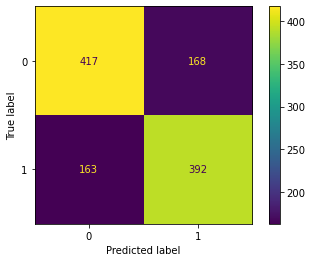

In [755]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

In [756]:
# Calculate precision, recall, f1-score, and support
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72       585
           1       0.70      0.71      0.70       555

    accuracy                           0.71      1140
   macro avg       0.71      0.71      0.71      1140
weighted avg       0.71      0.71      0.71      1140

Confusion Matrix:
[[417 168]
 [163 392]]


## ROC-AUC

In [757]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = logreg.predict_proba(X_test)[:,1]

roc_auc_score(y_test, test_probas)

0.7689320089320091

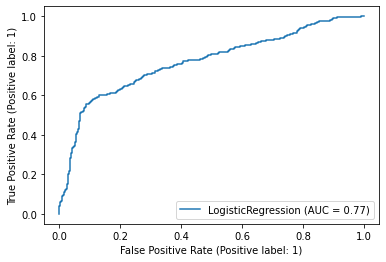

In [758]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(logreg, X_test, y_test);

## Decision Tree

In [759]:
# Separate features (X) and target (y)
X = logreg_selects.drop('churn', axis=1)
y = logreg_selects['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate model
print("Decision Tree Classifier Performance:")
print(classification_report(y_test, y_pred_dt))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier Performance:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       566
           1       0.47      0.55      0.51       101

    accuracy                           0.84       667
   macro avg       0.69      0.72      0.71       667
weighted avg       0.85      0.84      0.84       667

Confusion Matrix:
[[503  63]
 [ 45  56]]


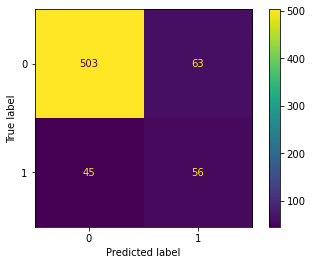

In [760]:
# Generate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Display confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_classifier.classes_)
disp_dt.plot()

In [761]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = dt_classifier.predict_proba(X_test)[:,1]

roc_auc_score(y_test, test_probas)

0.7215740125249274

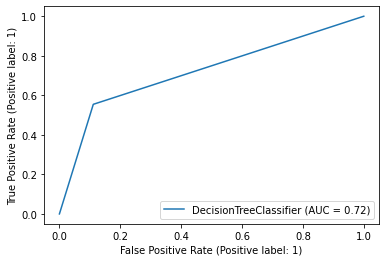

In [762]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(dt_classifier, X_test, y_test);

## Random Forest

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       566
           1       0.64      0.50      0.56       101

    accuracy                           0.88       667
   macro avg       0.78      0.73      0.75       667
weighted avg       0.87      0.88      0.88       667

Confusion Matrix:
[[537  29]
 [ 50  51]]


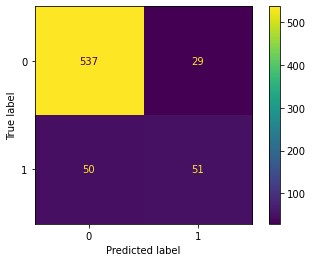

In [763]:
# Separate features (X) and target (y)
X = logreg_selects.drop('churn', axis=1)
y = logreg_selects['churn']

# Assuming you have split your data and trained the Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Predictions on test data
y_pred_rf = rf_classifier.predict(X_test)

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Evaluate model
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Display confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_classifier.classes_)
disp_rf.plot()

In [764]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = rf_classifier.predict_proba(X_test)[:,1]

roc_auc_score(y_test, test_probas)

0.8578263303362138

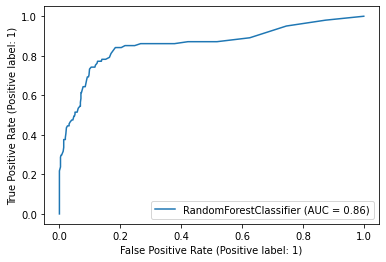

In [765]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(rf_classifier, X_test, y_test);

Let's look at feature importance using random forest again.

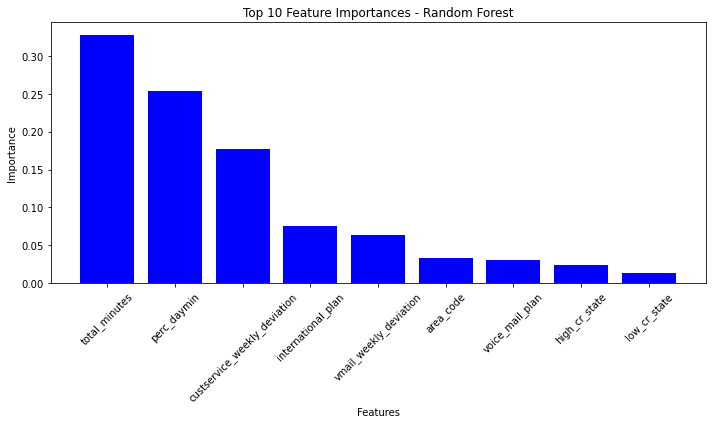

In [766]:
# Looking at feature importance

importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index[:10], feature_importances['Importance'].head(10), color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Let's use cross-validation and regularization to try and see how we can combat overfitting. 

We'll first apply this to our logistic regression model (log_reg) that we just ran.

### Using Ridge, and Cross-Validation

We'll use Ridge (l2), since we are now trying to account for collinearity, rather than further feature selection (which would make lasso for useful).

In [767]:
# Logistic Regression

X = logreg_selects.drop('churn', axis=1)
y = logreg_selects['churn']

# Standard Scaler
numeric_cols = X.columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create logistic regression model with regularization
logreg = LogisticRegression(penalty='l2', C=0.001, solver='liblinear')

In [768]:
# Fit the model on the entire dataset
logreg.fit(X_train, y_train)

# Optionally, perform cross-validation to evaluate the model
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')  # Adjust cv parameter as needed

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.66118421 0.69078947 0.67324561 0.70285088 0.68311404]
Mean CV accuracy: 0.6822368421052631


Let's see what correlation med_cr_state (states with a churn-rate between the 25th and 50th percentiles), havce to churn compared with high and low churn-rate states.

In [769]:
# Add med_cr_state column based on conditions
logreg_selects['med_cr_state'] = 0  # Initialize with 0
logreg_selects.loc[(logreg_selects['high_cr_state'] == 0) & (logreg_selects['low_cr_state'] == 0), 'med_cr_state'] = 1

# Test correlation with churn
correlation = logreg_selects[['med_cr_state', 'churn']].corr().iloc[0, 1]

print("Correlation between med_cr_state and churn:", correlation)

Correlation between med_cr_state and churn: -0.04544745978330309


In [770]:
logreg_selects['med_cr_state'].value_counts()

0    2512
1     821
Name: med_cr_state, dtype: int64

In [771]:
# Not a strong enough correlation compared to high and low states. Drop again to avoid multicollinearity.
logreg_selects.drop('med_cr_state', axis=1, inplace=True)

# Best Model: Logistic Regression

Among our models, logistic regression is the best at predicting class-1 (churn) outcomes, with these scores:

Precision: 0.62

Recall: 0.69

F-1 score: 0.65

ROC-AUC: 0.726

Our Random Forest model had a higher ROC-AUC score, yet considerably lower scores such as precision and recall when it came to accurately predicting churn. 

Our logistic regressin model still has room for improvement. Let's try one more method of tuning. If we look back at our very first logistic regression model (before we normalized all of the features), 'customer_service_calls' and 'total_day_minutes' both had higher correlations with our target variable 'churn' -- correlations of 0.21.

Since correlation is a hugely helpful metric when running logistic regression, let's try switching one these out for the normalized version of that same feature and see if it helps. We'll do customer_service_calls...it might be helpful to have the 'non-normalized' version...we can interpret this to stakeholders as "once a customer reaches *x* number of customer service calls, they are more likely to churn." Rather than determining the calls per week percentage.

In [772]:
logreg_selects = logreg_selects.merge(df[['customer_service_calls']], left_index=True, right_index=True)

In [773]:
# drop other customer service metric to avoid multicollinearity
logreg_selects.drop('custservice_weekly_deviation', axis=1, inplace=True)

In [774]:
# Run regression

X = logreg_selects.drop('churn', axis=1)
y = logreg_selects['churn']

# Standard Scaler
numeric_cols = X.columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [775]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Log regression
logreg = LogisticRegression(random_state=42)

In [776]:
# Finding best parameters using cross validation grid search
logreg = LogisticRegression(random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

y_pred = grid_search.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 0.01}
Accuracy: 0.7824561403508772
Confusion Matrix:
[[448 137]
 [111 444]]


In [777]:
# Fit logistic Regression with this C value
# Initialize Logistic Regression model with the best C value
logreg = LogisticRegression(C=0.1, max_iter=1000, random_state=42)

# Fit the model on training data
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)

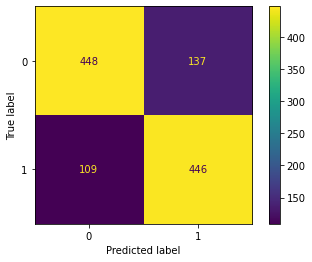

In [778]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

In [779]:
# Calculate precision, recall, f1-score, and support
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       585
           1       0.77      0.80      0.78       555

    accuracy                           0.78      1140
   macro avg       0.78      0.78      0.78      1140
weighted avg       0.79      0.78      0.78      1140

Confusion Matrix:
[[448 137]
 [109 446]]


In [780]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = logreg.predict_proba(X_test)[:,1]

roc_auc_score(y_test, test_probas)

0.8456179256179256

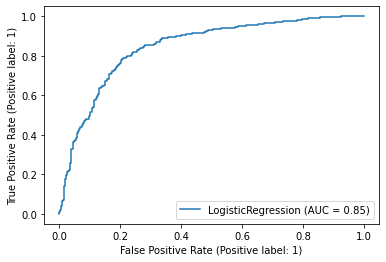

In [781]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(logreg, X_test, y_test);

This is much better! Let's do the same thing with our 'total_day_minutes' column, swapping it for our 'avg_daymin_daily' feature. We can do the same thing regarding interpreting this 'non-normalized' value -- by saying something such as, "Once a customer has logged this many daytime minutes, they are more likely to churn."

In [782]:
df.keys()

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes',
       'customer_service_calls', 'churn', 'prefix', 'total_charge',
       'churn_category', 'high_cr_state', 'low_cr_state'],
      dtype='object')

In [783]:
logreg_selects.keys()

Index(['area_code', 'international_plan', 'voice_mail_plan', 'churn',
       'total_minutes', 'perc_daymin', 'vmail_weekly_deviation',
       'high_cr_state', 'low_cr_state', 'customer_service_calls'],
      dtype='object')

In [784]:
logreg_selects = logreg_selects.merge(df[['total_day_minutes']], left_index=True, right_index=True)

In [785]:
logreg_selects.drop('perc_daymin', axis=1, inplace=True)

In [786]:
# Run regression again

X = logreg_selects.drop('churn', axis=1)
y = logreg_selects['churn']

# Standard Scaler
numeric_cols = X.columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [787]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Log regression
logreg = LogisticRegression(random_state=42)

In [788]:
# Finding best parameters using cross validation grid search
logreg = LogisticRegression(random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

y_pred = grid_search.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 0.1}
Accuracy: 0.7921052631578948
Confusion Matrix:
[[456 129]
 [108 447]]


In [789]:
# Fit logistic Regression with this C value
# Initialize Logistic Regression model with the best C value
logreg = LogisticRegression(C=0.1, max_iter=1000, random_state=42)

# Fit the model on training data
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)

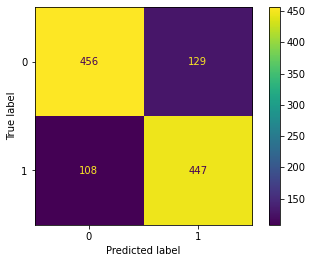

In [790]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

In [791]:
# Calculate precision, recall, f1-score, and support
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       585
           1       0.78      0.81      0.79       555

    accuracy                           0.79      1140
   macro avg       0.79      0.79      0.79      1140
weighted avg       0.79      0.79      0.79      1140

Confusion Matrix:
[[456 129]
 [108 447]]


In [792]:
# Calculate roc-auc
# Need predicted probabilities
test_probas = logreg.predict_proba(X_test)[:,1]

roc_auc_score(y_test, test_probas)

0.8480264880264881

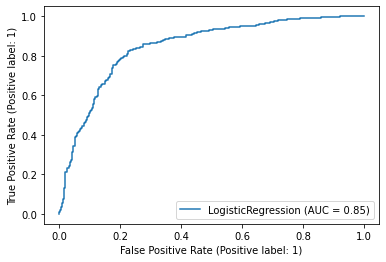

In [793]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(logreg, X_test, y_test);

# OFFICIAL MODEL SELECTION: Logistic Regression

The regression above is our best model! In order to fully understand why this model runs as well as it does, and make informed suggestions to stakeholders...let's examine the features that went into making a model that accurately predicts customer churn.

We can print the coefficients, and plot them for all of our features.

In [794]:
# Get coefficients and their corresponding feature names
coefficients = logreg.coef_[0]
feature_names = X_train.columns

# Create a DataFrame to display coefficients
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': abs(coefficients)  # Absolute value for magnitude comparison
})

# Sort by absolute coefficient value to see most influential features
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

print(importance_df)

                  Feature  Coefficient  Abs_Coefficient
7  customer_service_calls     0.778460         0.778460
1      international_plan     0.680522         0.680522
3           total_minutes     0.497236         0.497236
8       total_day_minutes     0.438066         0.438066
2         voice_mail_plan    -0.358773         0.358773
5           high_cr_state     0.351504         0.351504
4  vmail_weekly_deviation    -0.153026         0.153026
6            low_cr_state    -0.140330         0.140330
0               area_code    -0.001696         0.001696


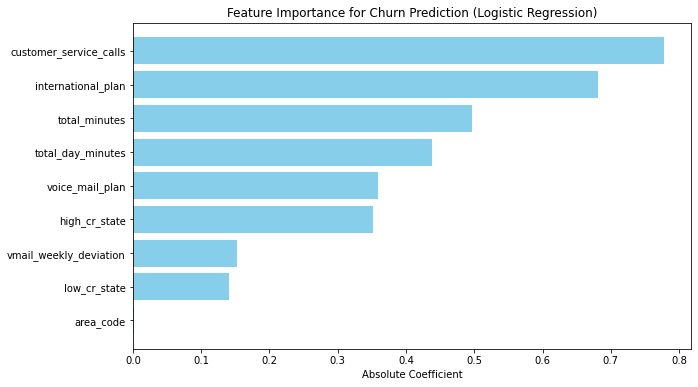

In [795]:
# Plot feature importance based on logistic regression
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Abs_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient')
plt.title('Feature Importance for Churn Prediction (Logistic Regression)')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features on top
plt.show()

### Interpreting State Columns

Let's make plots of what states belong to our high, medium, and low churn-rates. To have a better understanding when presenting to our stakeholders.

#### High Churn-Rate States

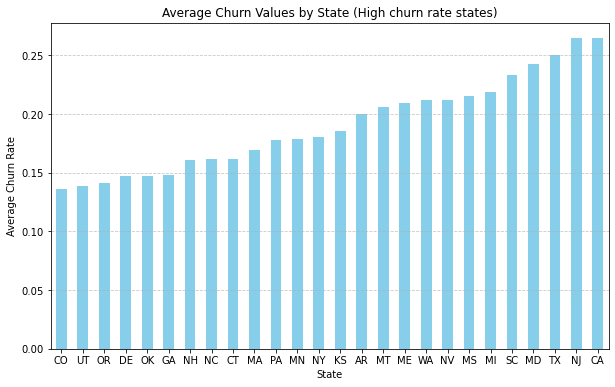

In [796]:
# Filter rows where high_cr_state is equal to 1
df_filtered = df[df['high_cr_state'] == 1]

# Group by 'state' and calculate average churn rate
avg_churn_by_state = df_filtered.groupby('state')['churn'].mean()

# Sort average churn rates in ascending order
avg_churn_by_state_high_sorted = avg_churn_by_state.sort_values()

# Plotting
plt.figure(figsize=(10, 6))
avg_churn_by_state_high_sorted.plot(kind='bar', color='skyblue')
plt.title('Average Churn Values by State (High churn rate states)')
plt.xlabel('State')
plt.ylabel('Average Churn Rate')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Medium Churn-Rate States

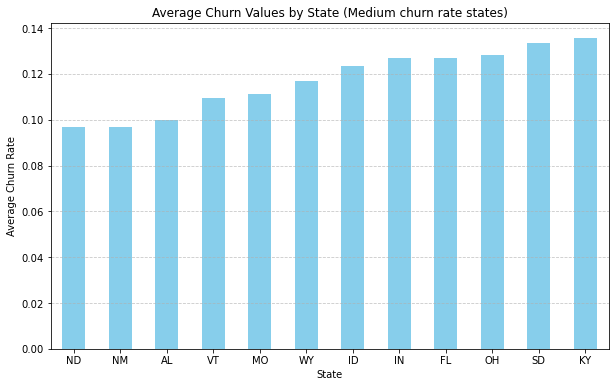

In [797]:
# Add med_cr_state column back into dataframe
df['med_cr_state'] = 0  # Initialize with 0
df.loc[(df['high_cr_state'] == 0) & (df['low_cr_state'] == 0), 'med_cr_state'] = 1

# Filter rows where med_cr_state is equal to 1
df_med_cr_state = df[df['med_cr_state'] == 1]

# Group by 'state' and calculate average churn rate
avg_churn_by_state_med = df_med_cr_state.groupby('state')['churn'].mean()

# Sort average churn rates in ascending order
avg_churn_by_state_med_sorted = avg_churn_by_state_med.sort_values()

# Plotting for med_cr_state
plt.figure(figsize=(10, 6))
avg_churn_by_state_med_sorted.plot(kind='bar', color='skyblue')
plt.title('Average Churn Values by State (Medium churn rate states)')
plt.xlabel('State')
plt.ylabel('Average Churn Rate')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Low Churn Rate States

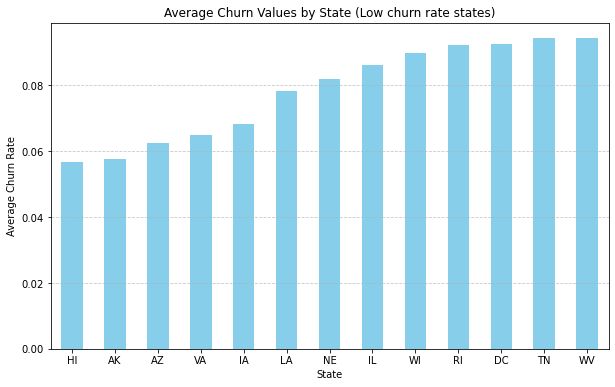

In [798]:
# Filter rows where low_cr_state is equal to 1
df_low_cr_state = df[df['low_cr_state'] == 1]

# Group by 'state' and calculate average churn rate
avg_churn_by_state_low = df_low_cr_state.groupby('state')['churn'].mean()

# Sort average churn rates in ascending order
avg_churn_by_state_low_sorted = avg_churn_by_state_low.sort_values()

# Plotting for low_cr_state
plt.figure(figsize=(10, 6))
avg_churn_by_state_low_sorted.plot(kind='bar', color='skyblue')
plt.title('Average Churn Values by State (Low churn rate states)')
plt.xlabel('State')
plt.ylabel('Average Churn Rate')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Extreme High-Churn Rate

Our high-churn rate has a larger number of states, because it's everything above the 50th quantile (the median). Let's narrow our focus to the states with extreme high churn-rate averages (about the 75th percentile).

In [799]:
# Adding Extreme High-Churn Rate
# Calculate mean churn rate for each state
state_churn_means = df.groupby('state')['churn'].mean()

# Calculate churn rate percentiles
quantiles = state_churn_means.quantile([0.25, 0.5, 0.75])

# Define threshold based on 75th quantile
high_cr_threshold = quantiles[0.75]

# Function to categorize churn rate
def categorize_churn_rate(churn_rate):
    if churn_rate > high_cr_threshold:
        return 1
    else:
        return 0

# Apply categorization function to each state's churn rate
df['extreme_high_cr_state'] = df['state'].map(state_churn_means.apply(categorize_churn_rate))

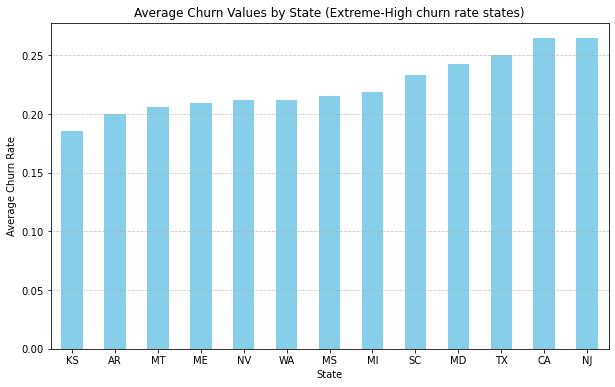

In [800]:
# Plot these states
# Filter rows where high_cr_state is equal to 1
df_filtered = df[df['extreme_high_cr_state'] == 1]

# Group by 'state' and calculate average churn rate
avg_churn_by_state = df_filtered.groupby('state')['churn'].mean()

# Sort average churn rates in ascending order
avg_churn_by_state_exthigh_sorted = avg_churn_by_state.sort_values()

# Plotting
plt.figure(figsize=(10, 6))
avg_churn_by_state_exthigh_sorted.plot(kind='bar', color='skyblue')
plt.title('Average Churn Values by State (Extreme-High churn rate states)')
plt.xlabel('State')
plt.ylabel('Average Churn Rate')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Plot Average Daytime Calltime per Extreme-High Churn Rate State

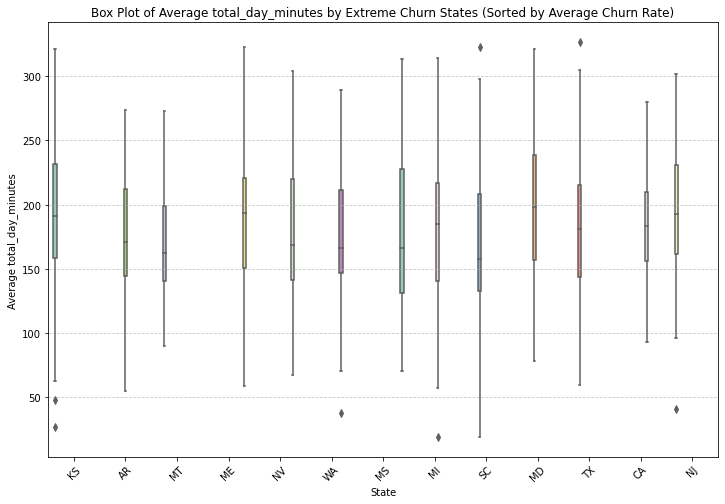

In [801]:
# Calculate average churn rate for each state
avg_churn_by_state = df_filtered.groupby('state')['churn'].mean().sort_values()

# Plotting box plots in sorted order
plt.figure(figsize=(12, 8))
sns.boxplot(x='state', y='total_day_minutes', data=df_filtered, order=avg_churn_by_state.index, palette='Set3', hue='state')
plt.title('Box Plot of Average total_day_minutes by Extreme Churn States (Sorted by Average Churn Rate)')
plt.xlabel('State')
plt.ylabel('Average total_day_minutes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([], frameon=False) 
plt.xticks(rotation=45)
plt.show()

##### Also plot average customer service calls

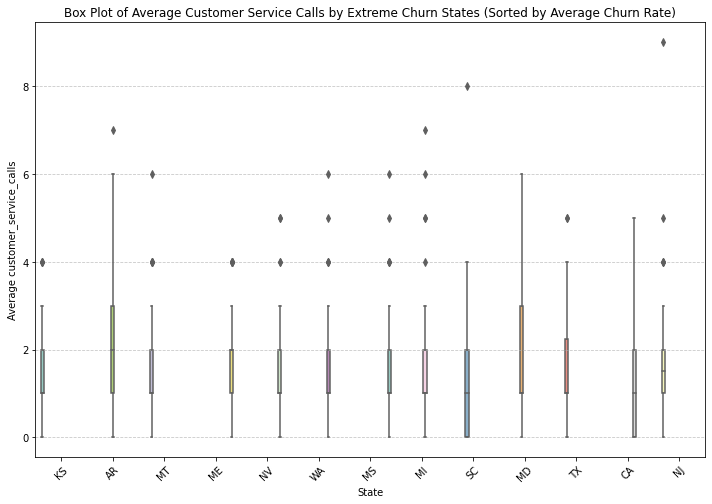

In [802]:
# Calculate average churn rate for each state
avg_churn_by_state = df_filtered.groupby('state')['churn'].mean().sort_values()

# Plotting box plots in sorted order
plt.figure(figsize=(12, 8))
sns.boxplot(x='state', y='customer_service_calls', data=df_filtered, order=avg_churn_by_state.index, palette='Set3', hue='state')
plt.title('Box Plot of Average Customer Service Calls by Extreme Churn States (Sorted by Average Churn Rate)')
plt.xlabel('State')
plt.ylabel('Average customer_service_calls')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([], frameon=False) 
plt.xticks(rotation=45)
plt.show()

#### Plot the same for Low Churn States

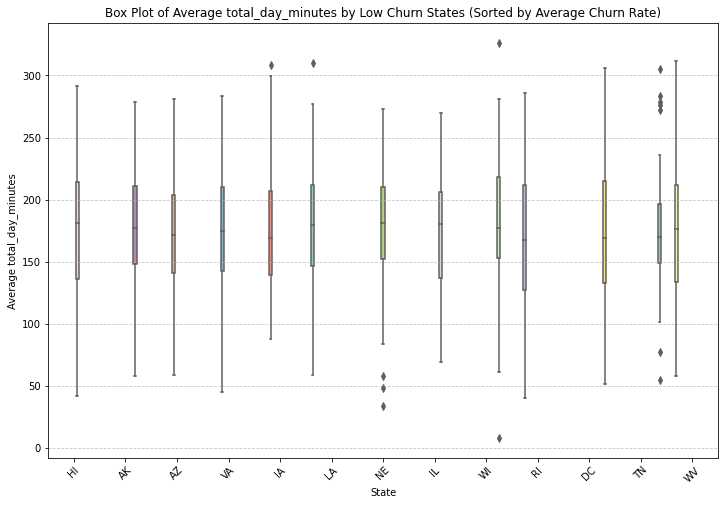

In [803]:
# Filter rows where low_cr_state is equal to 1
df_low_cr_state = df[df['low_cr_state'] == 1]

# Group by 'state' and calculate average churn rate
avg_churn_by_state_low = df_low_cr_state.groupby('state')['churn'].mean().sort_values()

# Plotting box plots in sorted order
plt.figure(figsize=(12, 8))
sns.boxplot(x='state', y='total_day_minutes', data=df_low_cr_state, order=avg_churn_by_state_low.index, palette='Set3', hue='state')
plt.title('Box Plot of Average total_day_minutes by Low Churn States (Sorted by Average Churn Rate)')
plt.xlabel('State')
plt.ylabel('Average total_day_minutes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([], frameon=False) 
plt.xticks(rotation=45)
plt.show()

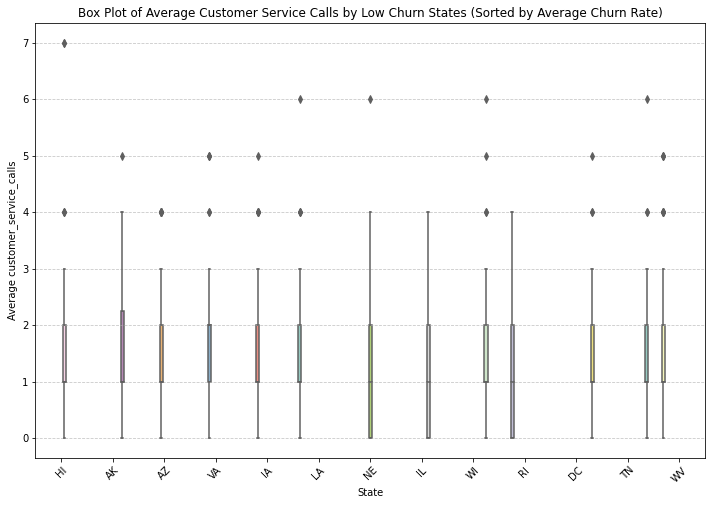

In [804]:
# Filter rows where low_cr_state is equal to 1
df_low_cr_state = df[df['low_cr_state'] == 1]

# Group by 'state' and calculate average churn rate
avg_churn_by_state_low = df_low_cr_state.groupby('state')['churn'].mean().sort_values()

# Plotting box plots in sorted order
plt.figure(figsize=(12, 8))
sns.boxplot(x='state', y='customer_service_calls', data=df_low_cr_state, order=avg_churn_by_state_low.index, palette='Set3', hue='state')
plt.title('Box Plot of Average Customer Service Calls by Low Churn States (Sorted by Average Churn Rate)')
plt.xlabel('State')
plt.ylabel('Average customer_service_calls')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([], frameon=False) 
plt.xticks(rotation=45)
plt.show()

#### Using original dataframe to contextualize predictive variables.

Let's see if any of the keys in our original dataframe, df, can help us better understand our selected features in our model

In [805]:
df.keys()

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes',
       'customer_service_calls', 'churn', 'prefix', 'total_charge',
       'churn_category', 'high_cr_state', 'low_cr_state', 'med_cr_state',
       'extreme_high_cr_state'],
      dtype='object')

In [806]:
logreg_selects.keys()

Index(['area_code', 'international_plan', 'voice_mail_plan', 'churn',
       'total_minutes', 'vmail_weekly_deviation', 'high_cr_state',
       'low_cr_state', 'customer_service_calls', 'total_day_minutes'],
      dtype='object')

In [807]:
keys

{'area_codes': {415: 'San Francisco, CA',
  510: 'East Bay cities, Northern CA',
  408: 'San Jose, CA'},
 'ppm': {'day_ppm': 0.17,
  'eve_ppm': 0.085,
  'night_ppm': 0.045,
  'intl_ppm': 0.27}}

#### Prefix

Let's revisit a phone's prefix, and see if there's any meaningful information there. We can run a chi-squared test like we did to determine the relevancy of 'state' values with regards to predicting churn.

In [808]:
# df contains 'state' (categorical) and 'churn' (binary) columns
contingency_table = pd.crosstab(df['prefix'], df['churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 85.65522068582706
P-value: 0.7430389045455594


Nope! Way too high of a p-value to reject null hypothesis. Moving on!

### International Plan

We know whether or not a person purchased the 'international_plan' is highly correlated to whether they churn. Let's examine what this means a little more...can a person only make international calls when they have an international_plan? If not, is there a difference in the charges made to a call?

In [809]:
df['international_plan'].value_counts()

0    3010
1     323
Name: international_plan, dtype: int64

In [810]:
# Filter rows with no international plan
filtered_df = df[df['international_plan'] == 0]

# Calculate value counts for total_intl_minutes, checking if they had the ability to make intl calls
value_counts = filtered_df['total_intl_minutes'].value_counts()

print("Value counts for total_intl_minutes where international_plan == 0:")
print(value_counts)

Value counts for total_intl_minutes where international_plan == 0:
10.0    55
11.3    54
9.8     53
10.2    53
10.6    51
        ..
2.6      1
18.9     1
3.1      1
3.6      1
17.6     1
Name: total_intl_minutes, Length: 159, dtype: int64


Hm...Let's calculate the average total_intl_charge per minute for people who did and did not purchase an international plan.

In [811]:
df_copy.keys()

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn', 'prefix', 'total_minutes',
       'total_charge'],
      dtype='object')

In [812]:
# Assign 'total_intl_charge' from df_copy to df
df['total_intl_charge'] = df_copy['total_intl_charge']

In [813]:
df['intl_minute_cost'] = df['total_intl_charge'] / df['total_intl_minutes']

In [814]:
# Filter rows with no international plan
no_intlplan = df[df['international_plan'] == 0]

# Same with intl plan
intlplan = df[df['international_plan'] == 1]

In [815]:
# Print both
print("Breakdown of cost per minute for customers with no international plan:")
no_intlplan['intl_minute_cost'].describe()

Breakdown of cost per minute for customers with no international plan:


count    2992.000000
mean        0.270059
std         0.000332
min         0.268182
25%         0.269811
50%         0.270000
75%         0.270297
max         0.272727
Name: intl_minute_cost, dtype: float64

In [816]:
print("Breakdown of cost per minute for customers with international plan:")
intlplan['intl_minute_cost'].describe()

Breakdown of cost per minute for customers with international plan:


count    323.000000
mean       0.270038
std        0.000300
min        0.269231
25%        0.269801
50%        0.270000
75%        0.270259
max        0.271429
Name: intl_minute_cost, dtype: float64

### No difference in intl call cost between plan and non-plan customers

It looks like there's no price reduction on international calls for customers who purchased an international plan! No wonder they were more likely to churn! 

What could this plan possibly provide? Maybe a greater number of intl calls, and/or a greater length (per minute) of intl calls that can be made? Let's check. 

In [817]:
# Print both
print("Breakdown of call-time for customers with no international plan:")
no_intlplan['total_intl_minutes'].describe()

Breakdown of call-time for customers with no international plan:


count    3010.000000
mean       10.195349
std         2.798937
min         0.000000
25%         8.400000
50%        10.200000
75%        12.100000
max        18.900000
Name: total_intl_minutes, dtype: float64

In [818]:
print("Breakdown of call-time for customers with international plan:")
intlplan['total_intl_minutes'].describe()

Breakdown of call-time for customers with international plan:


count    323.000000
mean      10.628173
std        2.697787
min        1.300000
25%        9.000000
50%       10.800000
75%       12.200000
max       20.000000
Name: total_intl_minutes, dtype: float64

In [819]:
# Adding 'total_intl_calls' from df_copy to df
df['total_intl_calls'] = df_copy['total_intl_calls']

# Restablish filtered dataframes
# Filter rows with no international plan
no_intlplan = df[df['international_plan'] == 0]

# Same with intl plan
intlplan = df[df['international_plan'] == 1]

In [820]:
# Print both
print("Breakdown of # of calls for customers with no international plan:")
no_intlplan['total_intl_calls'].describe()

Breakdown of # of calls for customers with no international plan:


count    3010.000000
mean        4.465449
std         2.442486
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        19.000000
Name: total_intl_calls, dtype: float64

In [821]:
print("Breakdown of # of calls for customers with international plan:")
intlplan['total_intl_calls'].describe()

Breakdown of # of calls for customers with international plan:


count    323.000000
mean       4.609907
std        2.629768
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       20.000000
Name: total_intl_calls, dtype: float64

This international plan really does not seem to provide any benefits, as far as we can see. The average number, length, and cost of international calls made is around the same for both international_plan subscribers, and non-subscribers.

### Voicemail Plan

Subscription to the voicemail plan actually had a *negative* correlation and coefficient with regards to predicting churn. Let's run similar tests, to determine what benefits this provide.

With voice_mail_plan, we can check whether or not customers seemed able to leave more or less voicemails.

In [822]:
# Filter rows with no international plan
no_vmailplan = df[df['voice_mail_plan'] == 0]

# Same with intl plan
vmailplan = df[df['voice_mail_plan'] == 1]

In [823]:
# Print both
print("Breakdown of # of voicemails for customers with no voicemail plan:")
no_vmailplan['number_vmail_messages'].describe()

Breakdown of # of voicemails for customers with no voicemail plan:


count    2411.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: number_vmail_messages, dtype: float64

In [824]:
# Print both
print("Breakdown of # of voicemails for customers with voicemail plan:")
vmailplan['number_vmail_messages'].describe()

Breakdown of # of voicemails for customers with voicemail plan:


count    922.000000
mean      29.277657
std        7.559027
min        4.000000
25%       24.000000
50%       29.000000
75%       34.000000
max       51.000000
Name: number_vmail_messages, dtype: float64

This plan seems a lot more intuitive. There are clear benefits to a subscription to a voicemail plan (AKA the ability to leave voicemails). Gaining true benefits would reasonably lead to lowered churn rates.

Knowing this, we can probably drop 'vmail_weekly_deviation' as a feature in our future logistic regression models.

In [825]:
logreg_selects.drop('vmail_weekly_deviation', axis=1, inplace=True)

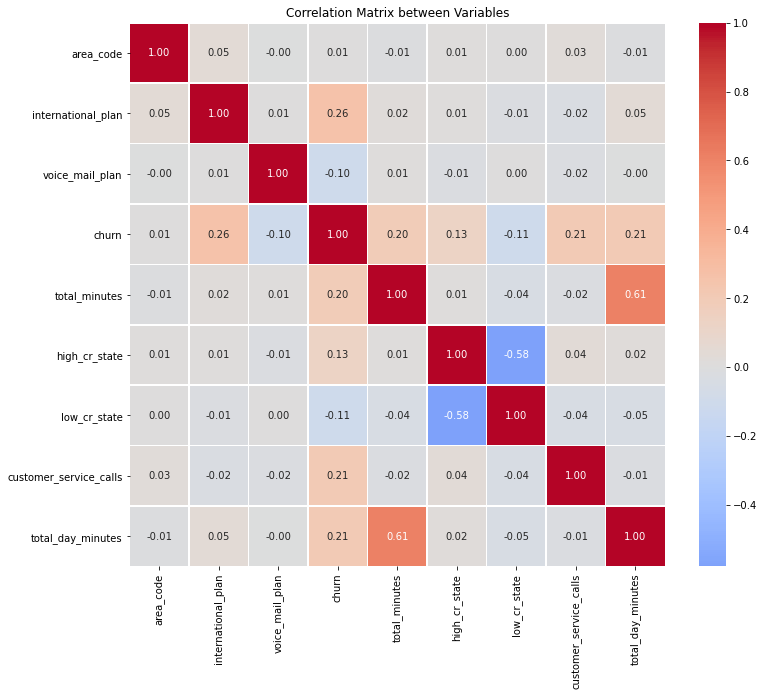

In [826]:
# Run new correlation matrix
logreg_selects = logreg_selects.select_dtypes(include=['float64','int64'])
# Calculate the correlation matrix
corr_matrix = logreg_selects.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix between Variables')
plt.show();

In [827]:
df_copy.keys()

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn', 'prefix', 'total_minutes',
       'total_charge'],
      dtype='object')

In [828]:
df.keys()

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes',
       'customer_service_calls', 'churn', 'prefix', 'total_charge',
       'churn_category', 'high_cr_state', 'low_cr_state', 'med_cr_state',
       'extreme_high_cr_state', 'total_intl_charge', 'intl_minute_cost',
       'total_intl_calls'],
      dtype='object')

In [829]:
norm_df.keys()

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'churn', 'prefix', 'total_minutes', 'perc_daymin',
       'perc_evemin', 'perc_nightmin', 'avg_intlmin_daily', 'weeks_active',
       'avg_custservice_weekly', 'avg_vmail_weekly', 'avg_daymin_daily',
       'avg_evemin_daily', 'avg_nightmin_daily', 'avg_totalmin_daily',
       'calltime_deviation_from_mean', 'intlmin_deviation_from_mean',
       'custservice_weekly_deviation', 'vmail_weekly_deviation',
       'high_cr_state', 'low_cr_state'],
      dtype='object')

In [830]:
df['total_minutes'] = df_copy['total_minutes']

In [831]:
df['perc_daytime_minutes'] = df['total_day_minutes'] / df['total_minutes']

# OOP CLASSIFICATION SYSTEM

Lastly, as icing on the cake...Let's make an OOP (Object Oriented Programming) Classification system for our stakeholders. So they can easily access a phone_numbers details, by different categories of information.

Well make a new dataframe **oop** for this.

In [832]:
oop = norm_df
oop['phone_number'] = df_copy['phone_number']
oop.keys()

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'churn', 'prefix', 'total_minutes', 'perc_daymin',
       'perc_evemin', 'perc_nightmin', 'avg_intlmin_daily', 'weeks_active',
       'avg_custservice_weekly', 'avg_vmail_weekly', 'avg_daymin_daily',
       'avg_evemin_daily', 'avg_nightmin_daily', 'avg_totalmin_daily',
       'calltime_deviation_from_mean', 'intlmin_deviation_from_mean',
       'custservice_weekly_deviation', 'vmail_weekly_deviation',
       'high_cr_state', 'low_cr_state', 'phone_number'],
      dtype='object')

In [833]:
# Identify columns to add
columns_to_add = [col for col in df_copy.columns if col not in oop.columns]

# Add columns from df_copy to oop
oop = pd.concat([oop, df_copy[columns_to_add]], axis=1)

In [834]:
oop['extreme_high_cr_state'] = df['extreme_high_cr_state']
oop['med_cr_state'] = df['med_cr_state']

In [835]:
oop.keys()

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'churn', 'prefix', 'total_minutes', 'perc_daymin',
       'perc_evemin', 'perc_nightmin', 'avg_intlmin_daily', 'weeks_active',
       'avg_custservice_weekly', 'avg_vmail_weekly', 'avg_daymin_daily',
       'avg_evemin_daily', 'avg_nightmin_daily', 'avg_totalmin_daily',
       'calltime_deviation_from_mean', 'intlmin_deviation_from_mean',
       'custservice_weekly_deviation', 'vmail_weekly_deviation',
       'high_cr_state', 'low_cr_state', 'phone_number',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'total_charge',
       'extreme_high_cr_state', 'med_cr_state'],
      dtype='object')

In [836]:
keys

{'area_codes': {415: 'San Francisco, CA',
  510: 'East Bay cities, Northern CA',
  408: 'San Jose, CA'},
 'ppm': {'day_ppm': 0.17,
  'eve_ppm': 0.085,
  'night_ppm': 0.045,
  'intl_ppm': 0.27}}

In [837]:
# Example PhoneCallDetails class (as defined previously)
class PhoneCallDetails:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)
        self.oop = oop

    def customer_info(self):
        return (
            f"Days Account Active: {self.account_length}\n"
            f"Weeks Account Active: {self.weeks_active}\n"
            f"Churn: {'YES' if self.churn == 1 else 'NO'}\n"
        )

    def location_info(self):
        
        if self.area_code == 415:
            location = 'San Francisco, CA'
        elif self.area_code == 510:
            location = 'East Bay cities, Northern CA'
        elif self.area_code == 408:
            location = 'San Jose, CA'
        else:
            location = 'Unknown Area'

        filtered_rows = self.oop[self.oop['state'] == self.state]
        state_churn_avg = filtered_rows['churn'].mean()

        if self.extreme_high_cr_state == 1:
            churn_rate = 'EXTREME'
        elif self.med_cr_state == 1:
            churn_rate = 'MEDIUM'
        elif self.low_cr_state == 1:
            churn_rate = 'LOW'
        else:
            churn_rate = 'HIGH'
            
        return (
            f"Area Code ({self.area_code}): {location}\n"
            f"Prefix: {self.prefix}\n"
            f"State: {self.state}\n"
            f"State Average Churn-Rate: {state_churn_avg}\n"
            f"State Churn-Rate Rating: {churn_rate}\n"
        )       

    def day_call_info(self):
        if self.total_day_minutes > 0:
            perc_minutes = (self.total_day_minutes / self.total_minutes) * 100
            avg_num_calls_daily = (self.total_day_calls / self.account_length)
            return (
                f"Total Calls: {self.total_day_calls}\n"
                f"Average Number of Calls Daily: {avg_num_calls_daily}\n"
                f"Total Minutes: {self.total_day_minutes}\n"
                f"Price-per-minute: 0.17\n"
                f"Total Charge: {self.total_day_charge}\n"
                f"Percentage Minutes Daytime: {perc_minutes}%\n"
            )
        else:
            return "No daytime calls for this phone number."
            
    def eve_call_info(self):
        if self.total_eve_minutes > 0:
            perc_minutes = (self.total_eve_minutes / self.total_minutes) * 100
            avg_num_calls_daily = (self.total_eve_calls / self.account_length)
            return (
                f"Total Calls: {self.total_eve_calls}\n"
                f"Average Number of Calls Daily: {avg_num_calls_daily}\n"
                f"Total Minutes: {self.total_eve_minutes}\n"
                f"Price-per-minute: 0.085\n"
                f"Total Charge: {self.total_eve_charge}\n"
                f"Percentage Minutes Evening: {perc_minutes}%\n"
            )
        else:
            return "No evening calls for this phone number."
            
    def night_call_info(self):
        if self.total_night_minutes > 0:
            perc_minutes = (self.total_night_minutes / self.total_minutes) * 100
            avg_num_calls_daily = (self.total_night_calls / self.account_length)
            return (
                f"Total Calls: {self.total_night_calls}\n"
                f"Average Number of Calls Daily: {avg_num_calls_daily}\n"
                f"Total Minutes: {self.total_night_minutes}\n"
                f"Price-per-minute: 0.045\n"
                f"Total Charge: {self.total_night_charge}\n"
                f"Percentage Minutes Nighttime: {perc_minutes}%\n"
            )
        else:
            return "No nighttime calls for this phone number."

    def intl_info(self):
        if self.total_intl_minutes > 0:
            avg_num_calls_daily = (self.total_intl_calls / self.account_length)
            return (
                f"This customer does {'have' if self.international_plan == 1 else 'not have'} an international plan.\n"
                f"Total Calls: {self.total_intl_calls}\n"
                f"Average Number of Calls Daily: {avg_num_calls_daily}\n"
                f"Total Minutes: {self.total_intl_minutes}\n"
                f"Deviation from Avg. Minutes of All Consumers: {self.intlmin_deviation_from_mean}\n"
                f"Price-per-minute: 0.27\n"
                f"Total Charge: {self.total_intl_charge}\n"
            )
        else:
            return (
                f"No international calls for this phone number.\n"
                f"This customer does {'have' if self.international_plan == 1 else 'not have'} an international plan.\n"
            )

    def vmail_info(self):
        if self.number_vmail_messages > 0:
            return (
                f"This customer does {'have' if self.voice_mail_plan == 1 else 'not have'} a voicemail plan.\n"
                f"Number Voicemail Messages: {self.number_vmail_messages}\n"
                f"Average Number Voicemails Weekly: {perc_vmail_weekly}\n"
                f"Deviation from Weekly Voicemails of All Consumers: {self.vmail_weekly_deviation}\n"
            )
        else:
            return (
                f"This customer left no voicemails.\n"
                f"This customer does{'have' if self.voice_mail_plan == 1 else 'not have'} a voicemail plan.\n"
            )

    def cust_service_info(self):
        if self.customer_service_calls > 0:
            return (
                f"Number Customer Service Calls: {self.customer_service_calls}\n"
                f"Average Number Calls Weekly: {self.perc_custservice_weekly}\n"
                f"Deviation from Weekly Cust-Service Calls of All Consumers: {self.custservice_weekly_deviation}\n"
            )

# Formatting phone_number values correctly
oop['phone_number'] = oop['phone_number'].str.replace('-', '')

# Function to create PhoneCallDetails objects from DataFrame rows
def phone_number_details(phone_number):
    try:
        row = oop.loc[oop['phone_number'] == phone_number].iloc[0]
        print(f"Metrics Available to Print: \n"
        f"number.customer_info \n"
        f"number.location_info \n"
        f"number.day_call_info \n"
        f"number.eve_call_info \n"
        f"number.night_call_info \n"
        f"number.intl_call_info \n"
        f"number.vmail_info \n"
        )
        return PhoneCallDetails(**row)
    except IndexError:
        print(f"Please input your number as a string: '3824657' rather than 3824657")
        return None

In [838]:
oop['phone_number'].value_counts()

3937322    1
3584412    1
3365702    1
3514616    1
3868943    1
          ..
3968662    1
3322889    1
3697017    1
3348817    1
3983004    1
Name: phone_number, Length: 3333, dtype: int64

In [839]:
number = phone_number_details('3824657')

print(number.customer_info())


Metrics Available to Print: 
number.customer_info 
number.location_info 
number.day_call_info 
number.eve_call_info 
number.night_call_info 
number.intl_call_info 
number.vmail_info 

Days Account Active: 128
Weeks Account Active: 18.285714285714285
Churn: NO



# Logistic Regression Model Evaluation for Predicting Customer Churn

**Model Accuracy:** The logistic regression model achieves an overall accuracy of 79%, indicating a strong ability to correctly predict both churn and non-churn instances.

**Precision and Recall:**

**Non-Churn** Predictions (Class 0):
* Precision: 81% (Proportion of correct non-churn predictions)
* Recall: 78% (Proportion of actual non-churn instances correctly predicted)  

**Churn** Predictions (Class 1):
* Precision: 78% (Proportion of correct churn predictions)
* Recall: 81% (Proportion of actual churn instances correctly predicted)

**F1-Score:** Both classes have an F1-score of 0.79, demonstrating a balanced performance between precision and recall, crucial for maintaining model reliability in both identifying churn and retaining non-churn customers.

<img src="images/image4.png" width="500">

**ROC AUC Score:** The model has a ROC AUC score of 0.849, reflecting its excellent capability to distinguish between the churn and non-churn classes. A higher ROC AUC score indicates better model performance in terms of sensitivity (true positive rate) and specificity (true negative rate).

**Confusion Matrix Analysis:**

True Negatives (TN): 455 - Correct non-churn predictions.  
False Positives (FP): 130 - Non-churn instances incorrectly predicted as churn.  
False Negatives (FN): 107 - Churn instances incorrectly predicted as non-churn.  
True Positives (TP): 448 - Correct churn predictions.  

This comprehensive analysis demonstrates that the model effectively completes classification tasks, making it an invaluable asset for pinpointing potential churn customers and facilitating targeted retention strategies.

**Most important features for the model**:

<img src="images/image3.png" width="500">

# Business Conclusions and Recommendations

Our analysis suggests that machine learning models can be used to accurately predict customer churn. We recommend using logistic regression as the main model for this prediction as it showed better performance in comparison to other models (desicion tree and random forest). Main advantages of logistic regression modeling are simplicity and easier interpretability. Introduing new features for analysis might require reevaluationg best model, as logistic regression shows better perfomance with limited number of features.

After a thorough analysis, finding the best predictive models and identyfing most importan features, we can propose following business resommendations to lower customer churn:

**1. Customer Service Calls**

Based on the analysis indicating that the number of customer service calls is correlated to higher churn rates. Customers who frequently call cutomer service are more likely to churn. There is no enough data to explore why those customers calls were made, what problems they were addressing and what were the outcomes - if their issues were solves or not. 
* We suggest collection and analysis of data on customer service calls (reason for call, type of issue, was the issue resolved, customer service experience satisfaction), so we can have a fuller picture of the existing correlation.


**2. International plan**

Customers with an active international plan are more likely to churn. After investigating, we found out that for a cost per international minute costs the same for people with international plan and without. This is our main assumption how international plan affects churn, other factors might include customers frequently travelling abroad and terminating contract every time, customers moving abroad. In general we advise to reassess and restructure the international plan offerings:  

* **Differentiate the international plan** by offering lower rates per minute or additional benefits such as free international texts or reduced rates for calls to popular destinations. This adds clear value compared to standard rates.
* **Gather feedback** from current international plan users to understand their pain points and expectations, which can help in designing a more attractive plan that addresses their needs. 
* Develop **tailored international plans** that benefit international callers, possibly with tiered pricing based on location to provide more flexibility and cost efficiency, e.g. 30 discounted minutes per month to a country of choice.

**3. Total minutes and total day minutes**

Customers with high total minutes and total day minutes are more likely to churn. Customers are charged per time they spend on a call, it's natural for customer to constantly try to reduce their spending. During our analysis we found out that day minutes cost more, compared to other times: day: 0.17, evening: 0.085, night: 0.045, international: 0.27.
Given that daytime minutes are more expensive and affect churn, we suggest the following recommendations to address potential churn related to this pricing structure:

* Evaluate the feasibility of **reducing the rates for daytime minutes**. This could mitigate the financial burden on customers who primarily use their phones during the day, leading to lower churn rates.
* Introduce more **flexible pricing plans** that allow customers to choose or customize their peak hours according to their usage patterns. This personalization can enhance customer satisfaction and loyalty.


**4. Location**

After analysing churn rates by state we indentified states with very high churn rate. There is no enough data to assume reasons and factors that affect churn rate by location. In this case our recommendations are:

* **Churn rate reasons by state analysis:** Collect additional data (feedback from customers) on reasons for churn distinguished by states.

## Next Steps
* Introduce new features for analysis, including Internet data usage and Internet data services
* Introduce new feature on cutomers demographics (age, sex, family plan or not, number of people in family)
* Include qualitative analysis for customer feedback to broaden understanding of features correlations